# Predictor and Generator for Audio Signals using Machine Learning
## Basic Research Project
### Student Name: Prachi Sharma
### Professor Supervisor: Prof. Gerald Schuller
### Research Assistant Supervisor: Renato de C. R. Profeta

### _Dataset Exploration and Files Preparation_

#### _Preparing files and Getting Metadata from the Dataset_

In [5]:
!wget --no-check-certificate https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2020-06-28 22:55:09--  https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip
Resolving philharmonia-assets.s3-eu-west-1.amazonaws.com... 52.218.89.32
Connecting to philharmonia-assets.s3-eu-west-1.amazonaws.com|52.218.89.32|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 260849422 (249M) [application/zip]
Saving to: `all-samples.zip'

     0K .......... .......... .......... .......... ..........  0%  657K 6m28s
    50K .......... .......... .......... .......... ..........  0% 1.45M 4m39s
   100K .......... .......... .......... .......... ..........  0% 9.58M 3m15s
   150K .......... .......... .......... .......... ..........  0% 1.53M 3m7s
   200K .......... .......... .......... .......... ..........  0% 13.5M 2m33s
   250K .......... .......... .......... ........

100700K .......... .......... .......... .......... .......... 39% 12.7M 23s
100750K .......... .......... .......... .......... .......... 39% 5.53M 23s
100800K .......... .......... .......... .......... .......... 39% 21.2M 23s
100850K .......... .......... .......... .......... .......... 39% 27.9M 23s
100900K .......... .......... .......... .......... .......... 39% 5.86M 23s
100950K .......... .......... .......... .......... .......... 39% 13.1M 23s
101000K .......... .......... .......... .......... .......... 39% 15.5M 23s
101050K .......... .......... .......... .......... .......... 39%  102K 24s
101100K .......... .......... .......... .......... .......... 39%  113M 24s
101150K .......... .......... .......... .......... .......... 39% 98.6M 24s
101200K .......... .......... .......... .......... .......... 39% 89.3M 24s
101250K .......... .......... .......... .......... .......... 39%  108M 24s
101300K .......... .......... .......... .......... .......... 39% 97.5M 24s

203900K .......... .......... .......... .......... .......... 80% 5.65M 8s
203950K .......... .......... .......... .......... .......... 80% 8.56M 8s
204000K .......... .......... .......... .......... .......... 80% 18.3M 8s
204050K .......... .......... .......... .......... .......... 80% 1.03M 8s
204100K .......... .......... .......... .......... .......... 80% 89.9M 8s
204150K .......... .......... .......... .......... .......... 80%  119M 8s
204200K .......... .......... .......... .......... .......... 80%  100M 8s
204250K .......... .......... .......... .......... .......... 80% 80.3M 8s
204300K .......... .......... .......... .......... .......... 80%  119M 8s
204350K .......... .......... .......... .......... .......... 80% 3.47M 8s
204400K .......... .......... .......... .......... .......... 80% 2.24M 8s
204450K .......... .......... .......... .......... .......... 80% 10.7M 8s
204500K .......... .......... .......... .......... .......... 80% 10.3M 8s
204550K ....

220600K .......... .......... .......... .......... .......... 86% 8.29M 5s
220650K .......... .......... .......... .......... .......... 86% 13.0M 5s
220700K .......... .......... .......... .......... .......... 86% 3.23M 5s
220750K .......... .......... .......... .......... .......... 86% 10.2M 5s
220800K .......... .......... .......... .......... .......... 86% 3.80M 5s
220850K .......... .......... .......... .......... .......... 86% 3.53M 5s
220900K .......... .......... .......... .......... .......... 86% 11.9M 5s
220950K .......... .......... .......... .......... .......... 86% 17.9M 5s
221000K .......... .......... .......... .......... .......... 86% 8.93M 5s
221050K .......... .......... .......... .......... .......... 86% 9.87M 5s
221100K .......... .......... .......... .......... .......... 86% 2.73M 5s
221150K .......... .......... .......... .......... .......... 86% 3.45M 5s
221200K .......... .......... .......... .......... .......... 86% 30.6M 5s
221250K ....

In [6]:
# For now you can try to use the !wget "https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip",
# and maybe with this no certificate if it doesn't work.

from pywget import wget
link = "https://philharmonia-assets.s3-eu-west-1.amazonaws.com/uploads/2020/02/12112005/all-samples.zip"
destination = "C:/Users/DELL/Updated_binder_enviro/" # this is the directory where you want the file to be saved
# in your case the can be something like /Users/DELL/Notebookks/
wget.download(link, destination)

ModuleNotFoundError: No module named 'pywget'

In [1]:
# Importing all the necessary libraries
import os
import librosa
import fnmatch
import sys
import numpy as np
import pickle


In [2]:
# The list instruments contain name of all the instruments whose audio file we are using
instruments = ['banjo','bass-clarinet','bassoon', 'cello','clarinet','contrabassoon',
               'english-horn','double-bass','flute','french-horn','guitar','mandolin',
               'oboe','percussion','saxophone','trombone','trumpet','tuba','viola','violin']

#lists for metadata
classes = []
durations = []
files_error = []
files_mp3 = []
files_pkl = []
files_npy = []

counter = 1

# Walk through all the files of the dataset saved in the directory all-samples
for root, dirnames, filenames in os.walk('/Users/DELL/Updated_binder_enviro/all-samples/'):
    #Get all .mp3 files
    for filename in fnmatch.filter(filenames, '*.mp3'):
        print ("Get %d = %s"%(counter, filename))
        # Get path and filename without extension
        name_no_ext = os.path.join(root,os.path.splitext(filename)[0])
        try:
            # Load mp3 files
            y, sr = librosa.load(os.path.join(root, filename), sr=None)
            # Append mp3 files to the list named file_mp3
            files_mp3.append(name_no_ext+'.mp3')
            # Save audio samples as numpy array
            np.save(name_no_ext,y)
            # Append .npy files to list files_npy
            files_npy.append(name_no_ext+'.npy')
            # Get duration of audio files
            duration =librosa.get_duration(y=y, sr=sr)
            # Append duration to the list durations
            durations.append(duration)
            # Get type os instrument from filename and appending it to the list classes
            if 'percussion' in root:
                class_inst='percussion'
                classes.append(class_inst) 
            else:
                for instrument in instruments:
                    if fnmatch.fnmatchcase(filename, instrument+'*'):
                        class_inst=instrument
                        classes.append(class_inst)  
                        # Create a dictionary with data from file
            data_dictionary = {'filename': (name_no_ext+'.npy'), 'sampling rate' : sr, 'duration' : duration, 'class' : class_inst}
            # Save dictionary to a file .pkl
            with open(name_no_ext+'.pkl', 'wb') as f:
                pickle.dump(data_dictionary, f)
                # Append .pkl file to a list files_pkl
            files_pkl.append(name_no_ext+'.pkl')
        except Exception as e:
            files_error.append({'file':os.path.join(root, filename),'error':sys.exc_info()[0]})
            print("Error loading %s. Error: %s" % (filename,e))
        counter+=1    
        

Get 1 = banjo_A3_very-long_forte_normal.mp3
Get 2 = banjo_A3_very-long_piano_normal.mp3
Get 3 = banjo_A4_very-long_forte_normal.mp3
Get 4 = banjo_A4_very-long_piano_normal.mp3
Get 5 = banjo_A5_very-long_forte_normal.mp3
Get 6 = banjo_A5_very-long_piano_normal.mp3
Get 7 = banjo_As3_very-long_forte_normal.mp3
Get 8 = banjo_As3_very-long_piano_normal.mp3
Get 9 = banjo_As4_very-long_forte_normal.mp3
Get 10 = banjo_As4_very-long_piano_normal.mp3
Get 11 = banjo_As5_very-long_forte_normal.mp3
Get 12 = banjo_As5_very-long_piano_normal.mp3
Get 13 = banjo_B3_very-long_forte_normal.mp3
Get 14 = banjo_B3_very-long_piano_normal.mp3
Get 15 = banjo_B4_very-long_forte_normal.mp3
Get 16 = banjo_B4_very-long_piano_normal.mp3
Get 17 = banjo_B5_very-long_forte_normal.mp3
Get 18 = banjo_B5_very-long_piano_normal.mp3
Get 19 = banjo_C3_very-long_forte_normal.mp3
Get 20 = banjo_C3_very-long_piano_normal.mp3
Get 21 = banjo_C4_very-long_forte_normal.mp3
Get 22 = banjo_C4_very-long_piano_normal.mp3
Get 23 = banj

Get 171 = bass-clarinet_As2_very-long_mezzo-piano_harmonic.mp3
Get 172 = bass-clarinet_As3_025_fortissimo_normal.mp3
Get 173 = bass-clarinet_As3_025_pianissimo_normal.mp3
Get 174 = bass-clarinet_As3_05_fortissimo_normal.mp3
Get 175 = bass-clarinet_As3_05_pianissimo_normal.mp3
Get 176 = bass-clarinet_As3_15_forte_normal.mp3
Get 177 = bass-clarinet_As3_15_fortissimo_normal.mp3
Get 178 = bass-clarinet_As3_15_mezzo-forte_normal.mp3
Get 179 = bass-clarinet_As3_15_pianissimo_normal.mp3
Get 180 = bass-clarinet_As3_15_piano_normal.mp3
Get 181 = bass-clarinet_As3_1_forte_normal.mp3
Get 182 = bass-clarinet_As3_1_fortissimo_normal.mp3
Get 183 = bass-clarinet_As3_1_mezzo-forte_normal.mp3
Get 184 = bass-clarinet_As3_1_pianissimo_normal.mp3
Get 185 = bass-clarinet_As3_phrase_forte_tremolo.mp3
Get 186 = bass-clarinet_As3_very-long_forte_normal.mp3
Get 187 = bass-clarinet_As3_very-long_mezzo-forte_normal.mp3
Get 188 = bass-clarinet_As3_very-long_piano_normal.mp3
Get 189 = bass-clarinet_As4_025_forte_n

Get 331 = bass-clarinet_C4_1_fortissimo_normal.mp3
Get 332 = bass-clarinet_C4_1_mezzo-forte_normal.mp3
Get 333 = bass-clarinet_C4_1_pianissimo_normal.mp3
Get 334 = bass-clarinet_C4_1_piano_normal.mp3
Get 335 = bass-clarinet_C5_025_forte_normal.mp3
Get 336 = bass-clarinet_C5_025_fortissimo_normal.mp3
Get 337 = bass-clarinet_C5_025_mezzo-forte_normal.mp3
Get 338 = bass-clarinet_C5_025_pianissimo_normal.mp3
Get 339 = bass-clarinet_C5_025_piano_normal.mp3
Get 340 = bass-clarinet_C5_05_forte_normal.mp3
Get 341 = bass-clarinet_C5_05_fortissimo_normal.mp3
Get 342 = bass-clarinet_C5_05_mezzo-forte_normal.mp3
Get 343 = bass-clarinet_C5_05_pianissimo_normal.mp3
Get 344 = bass-clarinet_C5_05_piano_normal.mp3
Get 345 = bass-clarinet_C5_15_forte_normal.mp3
Get 346 = bass-clarinet_C5_15_fortissimo_normal.mp3
Get 347 = bass-clarinet_C5_15_mezzo-forte_normal.mp3
Get 348 = bass-clarinet_C5_15_pianissimo_normal.mp3
Get 349 = bass-clarinet_C5_15_piano_normal.mp3
Get 350 = bass-clarinet_C5_1_forte_normal.

Get 490 = bass-clarinet_D4_15_mezzo-forte_normal.mp3
Get 491 = bass-clarinet_D4_15_pianissimo_normal.mp3
Get 492 = bass-clarinet_D4_15_piano_normal.mp3
Get 493 = bass-clarinet_D4_1_forte_normal.mp3
Get 494 = bass-clarinet_D4_1_fortissimo_normal.mp3
Get 495 = bass-clarinet_D4_1_mezzo-forte_normal.mp3
Get 496 = bass-clarinet_D4_1_pianissimo_normal.mp3
Get 497 = bass-clarinet_D4_1_piano_normal.mp3
Get 498 = bass-clarinet_D4_phrase_cresc-decresc_normal.mp3
Get 499 = bass-clarinet_D4_very-long_mezzo-piano_harmonic.mp3
Get 500 = bass-clarinet_D5_025_forte_normal.mp3
Get 501 = bass-clarinet_D5_025_fortissimo_normal.mp3
Get 502 = bass-clarinet_D5_025_mezzo-forte_normal.mp3
Get 503 = bass-clarinet_D5_025_pianissimo_normal.mp3
Get 504 = bass-clarinet_D5_025_piano_normal.mp3
Get 505 = bass-clarinet_D5_05_forte_normal.mp3
Get 506 = bass-clarinet_D5_05_fortissimo_normal.mp3
Get 507 = bass-clarinet_D5_05_mezzo-forte_normal.mp3
Get 508 = bass-clarinet_D5_05_pianissimo_normal.mp3
Get 509 = bass-clarin

Get 650 = bass-clarinet_E3_phrase_mezzo-forte_legato.mp3
Get 651 = bass-clarinet_E3_phrase_mezzo-forte_nonlegato.mp3
Get 652 = bass-clarinet_E3_phrase_mezzo-forte_staccatissimo.mp3
Get 653 = bass-clarinet_E3_phrase_mezzo-forte_tongued-slur.mp3
Get 654 = bass-clarinet_E4_025_forte_normal.mp3
Get 655 = bass-clarinet_E4_025_fortissimo_normal.mp3
Get 656 = bass-clarinet_E4_025_mezzo-forte_normal.mp3
Get 657 = bass-clarinet_E4_025_pianissimo_normal.mp3
Get 658 = bass-clarinet_E4_025_piano_normal.mp3
Get 659 = bass-clarinet_E4_05_forte_normal.mp3
Get 660 = bass-clarinet_E4_05_fortissimo_normal.mp3
Get 661 = bass-clarinet_E4_05_mezzo-forte_normal.mp3
Get 662 = bass-clarinet_E4_05_pianissimo_normal.mp3
Get 663 = bass-clarinet_E4_05_piano_normal.mp3
Get 664 = bass-clarinet_E4_15_forte_normal.mp3
Get 665 = bass-clarinet_E4_15_fortissimo_normal.mp3
Get 666 = bass-clarinet_E4_15_mezzo-forte_normal.mp3
Get 667 = bass-clarinet_E4_15_pianissimo_normal.mp3
Get 668 = bass-clarinet_E4_15_piano_normal.mp

Get 812 = bass-clarinet_Fs3_15_forte_normal.mp3
Get 813 = bass-clarinet_Fs3_15_fortissimo_normal.mp3
Get 814 = bass-clarinet_Fs3_15_mezzo-forte_normal.mp3
Get 815 = bass-clarinet_Fs3_15_pianissimo_normal.mp3
Get 816 = bass-clarinet_Fs3_15_piano_normal.mp3
Get 817 = bass-clarinet_Fs3_1_forte_normal.mp3
Get 818 = bass-clarinet_Fs3_1_fortissimo_normal.mp3
Get 819 = bass-clarinet_Fs3_1_mezzo-forte_normal.mp3
Get 820 = bass-clarinet_Fs3_1_pianissimo_normal.mp3
Get 821 = bass-clarinet_Fs3_1_piano_normal.mp3
Get 822 = bass-clarinet_Fs3_phrase_mezzo-forte_staccatissimo.mp3
Get 823 = bass-clarinet_Fs4_025_forte_normal.mp3
Get 824 = bass-clarinet_Fs4_025_fortissimo_normal.mp3
Get 825 = bass-clarinet_Fs4_025_mezzo-forte_normal.mp3
Get 826 = bass-clarinet_Fs4_025_pianissimo_normal.mp3
Get 827 = bass-clarinet_Fs4_025_piano_normal.mp3
Get 828 = bass-clarinet_Fs4_05_forte_normal.mp3
Get 829 = bass-clarinet_Fs4_05_fortissimo_normal.mp3
Get 830 = bass-clarinet_Fs4_05_mezzo-forte_normal.mp3
Get 831 = ba

Get 972 = bass-clarinet_Gs3_05_forte_normal.mp3
Get 973 = bass-clarinet_Gs3_05_fortissimo_normal.mp3
Get 974 = bass-clarinet_Gs3_05_pianissimo_normal.mp3
Get 975 = bass-clarinet_Gs3_05_piano_normal.mp3
Get 976 = bass-clarinet_Gs3_15_forte_normal.mp3
Get 977 = bass-clarinet_Gs3_15_fortissimo_normal.mp3
Get 978 = bass-clarinet_Gs3_15_pianissimo_normal.mp3
Get 979 = bass-clarinet_Gs3_15_piano_normal.mp3
Get 980 = bass-clarinet_Gs3_1_forte_normal.mp3
Get 981 = bass-clarinet_Gs3_1_fortissimo_normal.mp3
Get 982 = bass-clarinet_Gs3_1_pianissimo_normal.mp3
Get 983 = bass-clarinet_Gs3_1_piano_normal.mp3
Get 984 = bass-clarinet_Gs3_phrase_cresc-decresc_normal.mp3
Get 985 = bass-clarinet_Gs4_025_forte_normal.mp3
Get 986 = bass-clarinet_Gs4_025_fortissimo_normal.mp3
Get 987 = bass-clarinet_Gs4_025_mezzo-forte_normal.mp3
Get 988 = bass-clarinet_Gs4_025_pianissimo_normal.mp3
Get 989 = bass-clarinet_Gs4_025_piano_normal.mp3
Get 990 = bass-clarinet_Gs4_05_forte_normal.mp3
Get 991 = bass-clarinet_Gs4_0

Get 1143 = bassoon_As4_long_forte_minor-trill.mp3
Get 1144 = bassoon_B1_025_forte_normal.mp3
Get 1145 = bassoon_B1_025_fortissimo_normal.mp3
Get 1146 = bassoon_B1_025_mezzo-piano_normal.mp3
Get 1147 = bassoon_B1_025_piano_normal.mp3
Get 1148 = bassoon_B1_05_forte_normal.mp3
Get 1149 = bassoon_B1_05_fortissimo_normal.mp3
Get 1150 = bassoon_B1_05_mezzo-piano_normal.mp3
Get 1151 = bassoon_B1_05_piano_normal.mp3
Get 1152 = bassoon_B1_15_forte_normal.mp3
Get 1153 = bassoon_B1_15_fortissimo_normal.mp3
Get 1154 = bassoon_B1_15_mezzo-piano_normal.mp3
Get 1155 = bassoon_B1_15_piano_normal.mp3
Get 1156 = bassoon_B1_1_forte_normal.mp3
Get 1157 = bassoon_B1_1_fortissimo_normal.mp3
Get 1158 = bassoon_B1_1_mezzo-piano_normal.mp3
Get 1159 = bassoon_B1_1_piano_normal.mp3
Get 1160 = bassoon_B2_025_forte_normal.mp3
Get 1161 = bassoon_B2_025_fortissimo_normal.mp3
Get 1162 = bassoon_B2_025_mezzo-piano_normal.mp3
Get 1163 = bassoon_B2_025_piano_normal.mp3
Get 1164 = bassoon_B2_05_forte_normal.mp3
Get 1165 

Get 1323 = bassoon_Cs4_1_mezzo-forte_normal.mp3
Get 1324 = bassoon_Cs4_1_mezzo-piano_normal.mp3
Get 1325 = bassoon_Cs4_1_piano_normal.mp3
Get 1326 = bassoon_Cs4_very-long_cresc-decresc_normal.mp3
Get 1327 = bassoon_Cs5_025_forte_normal.mp3
Get 1328 = bassoon_Cs5_025_fortissimo_normal.mp3
Get 1329 = bassoon_Cs5_025_mezzo-piano_normal.mp3
Get 1330 = bassoon_Cs5_025_piano_normal.mp3
Get 1331 = bassoon_Cs5_05_forte_normal.mp3
Get 1332 = bassoon_Cs5_05_fortissimo_normal.mp3
Get 1333 = bassoon_Cs5_05_mezzo-forte_normal.mp3
Get 1334 = bassoon_Cs5_05_mezzo-piano_normal.mp3
Get 1335 = bassoon_Cs5_05_piano_normal.mp3
Get 1336 = bassoon_Cs5_15_piano_normal.mp3
Get 1337 = bassoon_Cs5_1_forte_normal.mp3
Get 1338 = bassoon_Cs5_1_fortissimo_normal.mp3
Get 1339 = bassoon_Cs5_1_mezzo-piano_normal.mp3
Get 1340 = bassoon_Cs5_1_piano_normal.mp3
Get 1341 = bassoon_D2_025_forte_normal.mp3
Get 1342 = bassoon_D2_025_fortissimo_normal.mp3
Get 1343 = bassoon_D2_025_mezzo-piano_normal.mp3
Get 1344 = bassoon_D2_0

Get 1502 = bassoon_E4_025_mezzo-piano_normal.mp3
Get 1503 = bassoon_E4_025_piano_normal.mp3
Get 1504 = bassoon_E4_05_forte_normal.mp3
Get 1505 = bassoon_E4_05_fortissimo_normal.mp3
Get 1506 = bassoon_E4_05_mezzo-forte_normal.mp3
Get 1507 = bassoon_E4_05_mezzo-piano_normal.mp3
Get 1508 = bassoon_E4_05_piano_normal.mp3
Get 1509 = bassoon_E4_15_mezzo-piano_normal.mp3
Get 1510 = bassoon_E4_1_forte_normal.mp3
Get 1511 = bassoon_E4_1_mezzo-forte_normal.mp3
Get 1512 = bassoon_E4_1_mezzo-piano_normal.mp3
Get 1513 = bassoon_E4_1_piano_normal.mp3
Get 1514 = bassoon_E4_long_forte_major-trill.mp3
Get 1515 = bassoon_E4_very-long_cresc-decresc_normal.mp3
Get 1516 = bassoon_E5_025_fortissimo_normal.mp3
Get 1517 = bassoon_E5_025_mezzo-piano_normal.mp3
Get 1518 = bassoon_E5_025_piano_normal.mp3
Get 1519 = bassoon_E5_05_forte_normal.mp3
Get 1520 = bassoon_E5_05_fortissimo_normal.mp3
Get 1521 = bassoon_E5_05_mezzo-piano_normal.mp3
Get 1522 = bassoon_E5_05_piano_normal.mp3
Get 1523 = bassoon_E5_15_forte_n

Get 1677 = bassoon_G4_05_forte_normal.mp3
Get 1678 = bassoon_G4_05_fortissimo_normal.mp3
Get 1679 = bassoon_G4_05_mezzo-forte_normal.mp3
Get 1680 = bassoon_G4_05_mezzo-piano_normal.mp3
Get 1681 = bassoon_G4_05_piano_normal.mp3
Get 1682 = bassoon_G4_15_piano_normal.mp3
Get 1683 = bassoon_G4_1_forte_normal.mp3
Get 1684 = bassoon_G4_1_fortissimo_normal.mp3
Get 1685 = bassoon_G4_1_mezzo-forte_normal.mp3
Get 1686 = bassoon_G4_1_mezzo-piano_normal.mp3
Get 1687 = bassoon_G4_1_piano_normal.mp3
Get 1688 = bassoon_G4_long_forte_major-trill.mp3
Get 1689 = bassoon_G4_long_forte_tremolo.mp3
Get 1690 = bassoon_G4_very-long_cresc-decresc_normal.mp3
Get 1691 = bassoon_G4_very-long_mezzo-piano_normal.mp3
Get 1692 = bassoon_G5_05_piano_normal.mp3
Get 1693 = bassoon_G5_1_mezzo-piano_normal.mp3
Get 1694 = bassoon_Gs2_025_forte_normal.mp3
Get 1695 = bassoon_Gs2_025_fortissimo_normal.mp3
Get 1696 = bassoon_Gs2_025_mezzo-forte_normal.mp3
Get 1697 = bassoon_Gs2_025_mezzo-piano_normal.mp3
Get 1698 = bassoon_Gs

Get 1846 = cello_As3_15_pianissimo_arco-normal.mp3
Get 1847 = cello_As3_1_forte_arco-normal.mp3
Get 1848 = cello_As3_1_fortissimo_arco-normal.mp3
Get 1849 = cello_As3_1_mezzo-piano_arco-normal.mp3
Get 1850 = cello_As3_1_pianissimo_arco-normal.mp3
Get 1851 = cello_As4_025_forte_arco-normal.mp3
Get 1852 = cello_As4_025_fortissimo_arco-normal.mp3
Get 1853 = cello_As4_025_mezzo-piano_arco-normal.mp3
Get 1854 = cello_As4_025_pianissimo_arco-normal.mp3
Get 1855 = cello_As4_05_forte_arco-normal.mp3
Get 1856 = cello_As4_05_fortissimo_arco-normal.mp3
Get 1857 = cello_As4_05_mezzo-piano_arco-normal.mp3
Get 1858 = cello_As4_05_pianissimo_arco-normal.mp3
Get 1859 = cello_As4_15_forte_arco-normal.mp3
Get 1860 = cello_As4_15_fortissimo_arco-normal.mp3
Get 1861 = cello_As4_15_mezzo-piano_arco-normal.mp3
Get 1862 = cello_As4_15_pianissimo_arco-normal.mp3
Get 1863 = cello_As4_1_forte_arco-normal.mp3
Get 1864 = cello_As4_1_fortissimo_arco-normal.mp3
Get 1865 = cello_As4_1_mezzo-piano_arco-normal.mp3
Get

Get 2010 = cello_C4_025_forte_arco-normal.mp3
Get 2011 = cello_C4_025_fortissimo_arco-normal.mp3
Get 2012 = cello_C4_025_mezzo-piano_arco-normal.mp3
Get 2013 = cello_C4_025_pianissimo_arco-normal.mp3
Get 2014 = cello_C4_05_fortissimo_arco-normal.mp3
Get 2015 = cello_C4_05_mezzo-piano_arco-normal.mp3
Get 2016 = cello_C4_05_pianissimo_arco-normal.mp3
Get 2017 = cello_C4_15_forte_arco-normal.mp3
Get 2018 = cello_C4_15_fortissimo_arco-normal.mp3
Get 2019 = cello_C4_15_mezzo-piano_arco-normal.mp3
Get 2020 = cello_C4_15_pianissimo_arco-normal.mp3
Get 2021 = cello_C4_1_forte_arco-normal.mp3
Get 2022 = cello_C4_1_fortissimo_arco-normal.mp3
Get 2023 = cello_C4_1_mezzo-piano_arco-minor-trill.mp3
Get 2024 = cello_C4_1_mezzo-piano_arco-normal.mp3
Get 2025 = cello_C4_1_pianissimo_arco-normal.mp3
Get 2026 = cello_C4_long_mezzo-forte_arco-harmonic.mp3
Get 2027 = cello_C4_phrase_cresc-decresc_arco-normal.mp3
Get 2028 = cello_C5_025_forte_arco-normal.mp3
Get 2029 = cello_C5_025_fortissimo_arco-normal.m

Get 2175 = cello_D4_15_fortissimo_arco-normal.mp3
Get 2176 = cello_D4_15_mezzo-piano_arco-normal.mp3
Get 2177 = cello_D4_15_pianissimo_arco-normal.mp3
Get 2178 = cello_D4_1_forte_arco-normal.mp3
Get 2179 = cello_D4_1_fortissimo_arco-normal.mp3
Get 2180 = cello_D4_1_mezzo-piano_arco-normal.mp3
Get 2181 = cello_D4_1_pianissimo_arco-normal.mp3
Get 2182 = cello_D4_phrase_fortissimo_arco-tremolo.mp3
Get 2183 = cello_D4_phrase_mezzo-forte_arco-detache.mp3
Get 2184 = cello_D4_phrase_mezzo-forte_arco-legato.mp3
Get 2185 = cello_D4_phrase_mezzo-forte_arco-spiccato.mp3
Get 2186 = cello_D4_phrase_mezzo-forte_arco-staccato.mp3
Get 2187 = cello_D5_025_forte_arco-normal.mp3
Get 2188 = cello_D5_025_fortissimo_arco-normal.mp3
Get 2189 = cello_D5_025_mezzo-forte_arco-col-legno-battuto.mp3
Get 2190 = cello_D5_025_mezzo-piano_arco-normal.mp3
Get 2191 = cello_D5_025_pianissimo_arco-normal.mp3
Get 2192 = cello_D5_05_forte_arco-normal.mp3
Get 2193 = cello_D5_05_fortissimo_arco-normal.mp3
Get 2194 = cello_D5

Get 2340 = cello_E5_1_mezzo-piano_arco-normal.mp3
Get 2341 = cello_E5_1_pianissimo_arco-normal.mp3
Get 2342 = cello_E6_1_mezzo-forte_arco-harmonic.mp3
Get 2343 = cello_F2_025_forte_arco-normal.mp3
Get 2344 = cello_F2_025_fortissimo_arco-normal.mp3
Get 2345 = cello_F2_025_pianissimo_arco-normal.mp3
Get 2346 = cello_F2_025_piano_arco-normal.mp3
Get 2347 = cello_F2_05_fortissimo_arco-normal.mp3
Get 2348 = cello_F2_05_pianissimo_arco-normal.mp3
Get 2349 = cello_F2_05_piano_arco-normal.mp3
Get 2350 = cello_F2_15_forte_arco-normal.mp3
Get 2351 = cello_F2_15_fortissimo_arco-normal.mp3
Get 2352 = cello_F2_15_pianissimo_arco-normal.mp3
Get 2353 = cello_F2_15_piano_arco-normal.mp3
Get 2354 = cello_F2_1_forte_arco-normal.mp3
Get 2355 = cello_F2_1_fortissimo_arco-normal.mp3
Get 2356 = cello_F2_1_pianissimo_arco-normal.mp3
Get 2357 = cello_F2_1_piano_arco-normal.mp3
Get 2358 = cello_F2_phrase_fortissimo_arco-au-talon.mp3
Get 2359 = cello_F2_phrase_mezzo-forte_arco-detache.mp3
Get 2360 = cello_F2_ph

Get 2505 = cello_G2_1_pianissimo_arco-normal.mp3
Get 2506 = cello_G2_1_piano_arco-major-trill.mp3
Get 2507 = cello_G2_phrase_fortissimo_arco-tremolo.mp3
Get 2508 = cello_G2_phrase_mezzo-forte_arco-legato.mp3
Get 2509 = cello_G2_phrase_mezzo-forte_arco-spiccato.mp3
Get 2510 = cello_G2_phrase_mezzo-forte_arco-staccato.mp3
Get 2511 = cello_G3_025_forte_arco-normal.mp3
Get 2512 = cello_G3_025_fortissimo_arco-normal.mp3
Get 2513 = cello_G3_025_pianissimo_arco-normal.mp3
Get 2514 = cello_G3_025_piano_arco-normal.mp3
Get 2515 = cello_G3_05_forte_arco-normal.mp3
Get 2516 = cello_G3_05_fortissimo_arco-normal.mp3
Get 2517 = cello_G3_05_mezzo-piano_arco-normal.mp3
Get 2518 = cello_G3_05_pianissimo_arco-normal.mp3
Get 2519 = cello_G3_15_forte_arco-normal.mp3
Get 2520 = cello_G3_15_fortissimo_arco-normal.mp3
Get 2521 = cello_G3_15_mezzo-piano_arco-normal.mp3
Get 2522 = cello_G3_15_pianissimo_arco-normal.mp3
Get 2523 = cello_G3_1_forte_arco-normal.mp3
Get 2524 = cello_G3_1_mezzo-piano_arco-normal.mp

Get 2670 = clarinet_A5_025_forte_normal.mp3
Get 2671 = clarinet_A5_025_fortissimo_normal.mp3
Get 2672 = clarinet_A5_025_pianissimo_normal.mp3
Get 2673 = clarinet_A5_025_piano_normal.mp3
Get 2674 = clarinet_A5_05_forte_normal.mp3
Get 2675 = clarinet_A5_05_fortissimo_normal.mp3
Get 2676 = clarinet_A5_05_pianissimo_normal.mp3
Get 2677 = clarinet_A5_05_piano_normal.mp3
Get 2678 = clarinet_A5_15_forte_normal.mp3
Get 2679 = clarinet_A5_15_fortissimo_normal.mp3
Get 2680 = clarinet_A5_15_pianissimo_normal.mp3
Get 2681 = clarinet_A5_15_piano_normal.mp3
Get 2682 = clarinet_A5_1_forte_normal.mp3
Get 2683 = clarinet_A5_1_fortissimo_normal.mp3
Get 2684 = clarinet_A5_1_pianissimo_normal.mp3
Get 2685 = clarinet_A5_1_piano_normal.mp3
Get 2686 = clarinet_A6_025_forte_normal.mp3
Get 2687 = clarinet_A6_025_fortissimo_normal.mp3
Get 2688 = clarinet_A6_025_pianissimo_normal.mp3
Get 2689 = clarinet_A6_025_piano_normal.mp3
Get 2690 = clarinet_A6_05_forte_normal.mp3
Get 2691 = clarinet_A6_05_fortissimo_normal

Get 2845 = clarinet_B6_15_piano_normal.mp3
Get 2846 = clarinet_B6_1_forte_normal.mp3
Get 2847 = clarinet_B6_1_fortissimo_normal.mp3
Get 2848 = clarinet_B6_1_pianissimo_normal.mp3
Get 2849 = clarinet_B6_1_piano_normal.mp3
Get 2850 = clarinet_C4_025_forte_normal.mp3
Get 2851 = clarinet_C4_025_fortissimo_normal.mp3
Get 2852 = clarinet_C4_025_pianissimo_normal.mp3
Get 2853 = clarinet_C4_025_piano_normal.mp3
Get 2854 = clarinet_C4_05_forte_normal.mp3
Get 2855 = clarinet_C4_05_fortissimo_normal.mp3
Get 2856 = clarinet_C4_05_pianissimo_normal.mp3
Get 2857 = clarinet_C4_05_piano_normal.mp3
Get 2858 = clarinet_C4_15_forte_normal.mp3
Get 2859 = clarinet_C4_15_fortissimo_normal.mp3
Get 2860 = clarinet_C4_15_pianissimo_normal.mp3
Get 2861 = clarinet_C4_15_piano_normal.mp3
Get 2862 = clarinet_C4_1_forte_normal.mp3
Get 2863 = clarinet_C4_1_fortissimo_normal.mp3
Get 2864 = clarinet_C4_1_pianissimo_normal.mp3
Get 2865 = clarinet_C4_1_piano_normal.mp3
Get 2866 = clarinet_C5_025_forte_normal.mp3
Get 286

Get 3020 = clarinet_D5_1_forte_normal.mp3
Get 3021 = clarinet_D5_1_fortissimo_normal.mp3
Get 3022 = clarinet_D5_1_pianissimo_normal.mp3
Get 3023 = clarinet_D5_1_piano_normal.mp3
Get 3024 = clarinet_D5_long_mezzo-forte_major-trill.mp3
Get 3025 = clarinet_D5_long_mezzo-forte_minor-trill.mp3
Get 3026 = clarinet_D5_very-long_cresc-decresc_normal.mp3
Get 3027 = clarinet_D5_very-long_piano_normal.mp3
Get 3028 = clarinet_D6_025_forte_normal.mp3
Get 3029 = clarinet_D6_025_fortissimo_normal.mp3
Get 3030 = clarinet_D6_025_pianissimo_normal.mp3
Get 3031 = clarinet_D6_025_piano_normal.mp3
Get 3032 = clarinet_D6_05_forte_normal.mp3
Get 3033 = clarinet_D6_05_fortissimo_normal.mp3
Get 3034 = clarinet_D6_05_pianissimo_normal.mp3
Get 3035 = clarinet_D6_05_piano_normal.mp3
Get 3036 = clarinet_D6_15_forte_normal.mp3
Get 3037 = clarinet_D6_15_fortissimo_normal.mp3
Get 3038 = clarinet_D6_15_pianissimo_normal.mp3
Get 3039 = clarinet_D6_15_piano_normal.mp3
Get 3040 = clarinet_D6_1_forte_normal.mp3
Get 3041 =

Get 3195 = clarinet_F3_15_fortissimo_normal.mp3
Get 3196 = clarinet_F3_15_pianissimo_normal.mp3
Get 3197 = clarinet_F3_15_piano_normal.mp3
Get 3198 = clarinet_F3_1_forte_normal.mp3
Get 3199 = clarinet_F3_1_fortissimo_normal.mp3
Get 3200 = clarinet_F3_1_pianissimo_normal.mp3
Get 3201 = clarinet_F3_1_piano_normal.mp3
Get 3202 = clarinet_F3_long_mezzo-forte_major-trill.mp3
Get 3203 = clarinet_F3_long_mezzo-forte_minor-trill.mp3
Get 3204 = clarinet_F3_very-long_cresc-decresc_normal.mp3
Get 3205 = clarinet_F4_025_forte_normal.mp3
Get 3206 = clarinet_F4_025_fortissimo_normal.mp3
Get 3207 = clarinet_F4_025_pianissimo_normal.mp3
Get 3208 = clarinet_F4_025_piano_normal.mp3
Get 3209 = clarinet_F4_05_forte_normal.mp3
Get 3210 = clarinet_F4_05_fortissimo_normal.mp3
Get 3211 = clarinet_F4_05_pianissimo_normal.mp3
Get 3212 = clarinet_F4_05_piano_normal.mp3
Get 3213 = clarinet_F4_15_forte_normal.mp3
Get 3214 = clarinet_F4_15_fortissimo_normal.mp3
Get 3215 = clarinet_F4_15_pianissimo_normal.mp3
Get 32

Get 3368 = clarinet_G4_1_piano_normal.mp3
Get 3369 = clarinet_G5_025_forte_normal.mp3
Get 3370 = clarinet_G5_025_fortissimo_normal.mp3
Get 3371 = clarinet_G5_025_pianissimo_normal.mp3
Get 3372 = clarinet_G5_025_piano_normal.mp3
Get 3373 = clarinet_G5_05_forte_normal.mp3
Get 3374 = clarinet_G5_05_fortissimo_normal.mp3
Get 3375 = clarinet_G5_05_pianissimo_normal.mp3
Get 3376 = clarinet_G5_05_piano_normal.mp3
Get 3377 = clarinet_G5_15_forte_normal.mp3
Get 3378 = clarinet_G5_15_fortissimo_normal.mp3
Get 3379 = clarinet_G5_15_pianissimo_normal.mp3
Get 3380 = clarinet_G5_15_piano_normal.mp3
Get 3381 = clarinet_G5_1_forte_normal.mp3
Get 3382 = clarinet_G5_1_fortissimo_normal.mp3
Get 3383 = clarinet_G5_1_pianissimo_normal.mp3
Get 3384 = clarinet_G5_1_piano_normal.mp3
Get 3385 = clarinet_G6_025_forte_normal.mp3
Get 3386 = clarinet_G6_025_fortissimo_normal.mp3
Get 3387 = clarinet_G6_025_pianissimo_normal.mp3
Get 3388 = clarinet_G6_025_piano_normal.mp3
Get 3389 = clarinet_G6_05_forte_normal.mp3
G

Get 3537 = contrabassoon_As1_025_forte_normal.mp3
Get 3538 = contrabassoon_As1_025_fortissimo_normal.mp3
Get 3539 = contrabassoon_As1_025_mezzo-forte_normal.mp3
Get 3540 = contrabassoon_As1_025_piano_normal.mp3
Get 3541 = contrabassoon_As1_05_forte_normal.mp3
Get 3542 = contrabassoon_As1_05_fortissimo_normal.mp3
Get 3543 = contrabassoon_As1_05_mezzo-forte_normal.mp3
Get 3544 = contrabassoon_As1_05_piano_normal.mp3
Get 3545 = contrabassoon_As1_15_forte_normal.mp3
Get 3546 = contrabassoon_As1_15_fortissimo_normal.mp3
Get 3547 = contrabassoon_As1_15_mezzo-forte_normal.mp3
Get 3548 = contrabassoon_As1_15_piano_normal.mp3
Get 3549 = contrabassoon_As1_1_forte_normal.mp3
Get 3550 = contrabassoon_As1_1_fortissimo_normal.mp3
Get 3551 = contrabassoon_As1_1_mezzo-forte_normal.mp3
Get 3552 = contrabassoon_As1_1_piano_normal.mp3
Get 3553 = contrabassoon_As1_phrase_mezzo-forte_legato.mp3
Get 3554 = contrabassoon_As1_phrase_mezzo-forte_nonlegato.mp3
Get 3555 = contrabassoon_As1_phrase_mezzo-forte_sta

Get 3694 = contrabassoon_C3_025_mezzo-forte_normal.mp3
Get 3695 = contrabassoon_C3_025_piano_normal.mp3
Get 3696 = contrabassoon_C3_05_forte_normal.mp3
Get 3697 = contrabassoon_C3_05_fortissimo_normal.mp3
Get 3698 = contrabassoon_C3_05_mezzo-forte_normal.mp3
Get 3699 = contrabassoon_C3_05_piano_normal.mp3
Get 3700 = contrabassoon_C3_15_forte_normal.mp3
Get 3701 = contrabassoon_C3_15_fortissimo_normal.mp3
Get 3702 = contrabassoon_C3_15_mezzo-forte_normal.mp3
Get 3703 = contrabassoon_C3_15_piano_normal.mp3
Get 3704 = contrabassoon_C3_1_forte_normal.mp3
Get 3705 = contrabassoon_C3_1_fortissimo_normal.mp3
Get 3706 = contrabassoon_C3_1_mezzo-forte_normal.mp3
Get 3707 = contrabassoon_C3_1_piano_normal.mp3
Get 3708 = contrabassoon_C3_long_forte_fluttertonguing.mp3
Get 3709 = contrabassoon_C3_phrase_mezzo-forte_legato.mp3
Get 3710 = contrabassoon_C3_phrase_mezzo-forte_nonlegato.mp3
Get 3711 = contrabassoon_C3_phrase_mezzo-forte_staccatissimo.mp3
Get 3712 = contrabassoon_C3_phrase_mezzo-forte_s

Get 3853 = contrabassoon_Ds1_025_piano_normal.mp3
Get 3854 = contrabassoon_Ds1_05_forte_normal.mp3
Get 3855 = contrabassoon_Ds1_05_fortissimo_normal.mp3
Get 3856 = contrabassoon_Ds1_05_mezzo-forte_normal.mp3
Get 3857 = contrabassoon_Ds1_05_piano_normal.mp3
Get 3858 = contrabassoon_Ds1_15_forte_normal.mp3
Get 3859 = contrabassoon_Ds1_15_fortissimo_normal.mp3
Get 3860 = contrabassoon_Ds1_15_mezzo-forte_normal.mp3
Get 3861 = contrabassoon_Ds1_15_piano_normal.mp3
Get 3862 = contrabassoon_Ds1_1_forte_normal.mp3
Get 3863 = contrabassoon_Ds1_1_fortissimo_normal.mp3
Get 3864 = contrabassoon_Ds1_1_mezzo-forte_normal.mp3
Get 3865 = contrabassoon_Ds1_1_piano_normal.mp3
Get 3866 = contrabassoon_Ds1_phrase_mezzo-forte_legato.mp3
Get 3867 = contrabassoon_Ds1_phrase_mezzo-forte_nonlegato.mp3
Get 3868 = contrabassoon_Ds1_phrase_mezzo-forte_staccatissimo.mp3
Get 3869 = contrabassoon_Ds1_phrase_mezzo-forte_staccato.mp3
Get 3870 = contrabassoon_Ds1_phrase_mezzo-forte_tenuto.mp3
Get 3871 = contrabassoon_D

Get 4010 = contrabassoon_F3_025_piano_normal.mp3
Get 4011 = contrabassoon_F3_05_forte_normal.mp3
Get 4012 = contrabassoon_F3_05_fortissimo_normal.mp3
Get 4013 = contrabassoon_F3_05_mezzo-forte_normal.mp3
Get 4014 = contrabassoon_F3_05_piano_normal.mp3
Get 4015 = contrabassoon_F3_15_forte_normal.mp3
Get 4016 = contrabassoon_F3_15_fortissimo_normal.mp3
Get 4017 = contrabassoon_F3_15_mezzo-forte_normal.mp3
Get 4018 = contrabassoon_F3_15_piano_normal.mp3
Get 4019 = contrabassoon_F3_1_forte_normal.mp3
Get 4020 = contrabassoon_F3_1_fortissimo_normal.mp3
Get 4021 = contrabassoon_F3_1_mezzo-forte_normal.mp3
Get 4022 = contrabassoon_F3_1_piano_normal.mp3
Get 4023 = contrabassoon_F3_long_forte_fluttertonguing.mp3
Get 4024 = contrabassoon_Fs1_025_forte_normal.mp3
Get 4025 = contrabassoon_Fs1_025_fortissimo_normal.mp3
Get 4026 = contrabassoon_Fs1_025_mezzo-forte_normal.mp3
Get 4027 = contrabassoon_Fs1_05_forte_normal.mp3
Get 4028 = contrabassoon_Fs1_05_fortissimo_normal.mp3
Get 4029 = contrabassoo

Get 4167 = contrabassoon_Gs3_025_fortissimo_normal.mp3
Get 4168 = contrabassoon_Gs3_025_mezzo-forte_normal.mp3
Get 4169 = contrabassoon_Gs3_025_piano_normal.mp3
Get 4170 = contrabassoon_Gs3_05_forte_normal.mp3
Get 4171 = contrabassoon_Gs3_05_fortissimo_normal.mp3
Get 4172 = contrabassoon_Gs3_05_mezzo-forte_normal.mp3
Get 4173 = contrabassoon_Gs3_05_piano_normal.mp3
Get 4174 = contrabassoon_Gs3_15_forte_normal.mp3
Get 4175 = contrabassoon_Gs3_15_fortissimo_normal.mp3
Get 4176 = contrabassoon_Gs3_15_mezzo-forte_normal.mp3
Get 4177 = contrabassoon_Gs3_15_piano_normal.mp3
Get 4178 = contrabassoon_Gs3_1_forte_normal.mp3
Get 4179 = contrabassoon_Gs3_1_fortissimo_normal.mp3
Get 4180 = contrabassoon_Gs3_1_mezzo-forte_normal.mp3
Get 4181 = contrabassoon_Gs3_1_piano_normal.mp3
Get 4182 = contrabassoon_Gs3_long_forte_fluttertonguing.mp3
Get 4183 = contrabassoon_Gs3_long_forte_minor-trill.mp3
Get 4184 = double-bass_A1_025_forte_arco-normal.mp3
Get 4185 = double-bass_A1_025_fortissimo_arco-normal.m

Get 4314 = double-bass_B1_025_fortissimo_arco-normal.mp3
Get 4315 = double-bass_B1_025_mezzo-forte_arco-normal.mp3
Get 4316 = double-bass_B1_025_mezzo-piano_arco-normal.mp3
Get 4317 = double-bass_B1_025_molto-pianissimo_arco-normal.mp3
Get 4318 = double-bass_B1_05_forte_arco-normal.mp3
Get 4319 = double-bass_B1_05_fortissimo_arco-normal.mp3
Get 4320 = double-bass_B1_05_mezzo-forte_arco-normal.mp3
Get 4321 = double-bass_B1_05_molto-pianissimo_arco-normal.mp3
Get 4322 = double-bass_B1_05_pianissimo_arco-normal.mp3
Get 4323 = double-bass_B1_05_piano_arco-normal.mp3
Get 4324 = double-bass_B1_15_mezzo-forte_arco-normal.mp3
Get 4325 = double-bass_B1_1_forte_arco-normal.mp3
Get 4326 = double-bass_B1_1_fortissimo_arco-normal.mp3
Get 4327 = double-bass_B1_1_mezzo-forte_arco-normal.mp3
Get 4328 = double-bass_B1_1_molto-pianissimo_arco-normal.mp3
Get 4329 = double-bass_B1_1_piano_arco-normal.mp3
Get 4330 = double-bass_B1_phrase_mezzo-forte_arco-au-talon.mp3
Get 4331 = double-bass_B1_phrase_mezzo-

Get 4460 = double-bass_Cs3_025_forte_arco-normal.mp3
Get 4461 = double-bass_Cs3_025_fortissimo_arco-normal.mp3
Get 4462 = double-bass_Cs3_025_mezzo-forte_arco-col-legno-battuto.mp3
Get 4463 = double-bass_Cs3_025_mezzo-forte_arco-normal.mp3
Get 4464 = double-bass_Cs3_025_mezzo-piano_arco-normal.mp3
Get 4465 = double-bass_Cs3_025_pianissimo_arco-normal.mp3
Get 4466 = double-bass_Cs3_025_piano_pizz-normal.mp3
Get 4467 = double-bass_Cs3_05_forte_arco-normal.mp3
Get 4468 = double-bass_Cs3_05_fortissimo_arco-normal.mp3
Get 4469 = double-bass_Cs3_05_mezzo-forte_arco-normal.mp3
Get 4470 = double-bass_Cs3_05_mezzo-piano_arco-normal.mp3
Get 4471 = double-bass_Cs3_05_pianissimo_arco-normal.mp3
Get 4472 = double-bass_Cs3_15_forte_arco-normal.mp3
Get 4473 = double-bass_Cs3_15_mezzo-forte_arco-normal.mp3
Get 4474 = double-bass_Cs3_1_forte_arco-normal.mp3
Get 4475 = double-bass_Cs3_1_fortissimo_arco-normal.mp3
Get 4476 = double-bass_Cs3_1_mezzo-forte_arco-normal.mp3
Get 4477 = double-bass_Cs3_1_mezzo

Get 4607 = double-bass_Ds4_025_mezzo-piano_arco-normal.mp3
Get 4608 = double-bass_Ds4_025_pianissimo_arco-normal.mp3
Get 4609 = double-bass_Ds4_05_forte_arco-normal.mp3
Get 4610 = double-bass_Ds4_05_fortissimo_arco-normal.mp3
Get 4611 = double-bass_Ds4_05_mezzo-forte_arco-normal.mp3
Get 4612 = double-bass_Ds4_05_mezzo-piano_arco-normal.mp3
Get 4613 = double-bass_Ds4_05_pianissimo_arco-normal.mp3
Get 4614 = double-bass_Ds4_15_forte_arco-normal.mp3
Get 4615 = double-bass_Ds4_15_fortissimo_arco-normal.mp3
Get 4616 = double-bass_Ds4_15_mezzo-forte_arco-normal.mp3
Get 4617 = double-bass_Ds4_15_mezzo-piano_arco-normal.mp3
Get 4618 = double-bass_Ds4_15_molto-pianissimo_arco-normal.mp3
Get 4619 = double-bass_Ds4_1_forte_arco-normal.mp3
Get 4620 = double-bass_Ds4_1_fortissimo_arco-normal.mp3
Get 4621 = double-bass_Ds4_1_mezzo-forte_arco-normal.mp3
Get 4622 = double-bass_Ds4_1_mezzo-piano_arco-normal.mp3
Get 4623 = double-bass_Ds4_1_pianissimo_arco-normal.mp3
Get 4624 = double-bass_E1_025_forte_

Get 4751 = double-bass_F1_phrase_mezzo-forte_arco-major-trill.mp3
Get 4752 = double-bass_F1_phrase_mezzo-forte_molto-vibrato.mp3
Get 4753 = double-bass_F1_phrase_mezzo-forte_non-vibrato.mp3
Get 4754 = double-bass_F2_025_forte_arco-normal.mp3
Get 4755 = double-bass_F2_025_fortissimo_arco-normal.mp3
Get 4756 = double-bass_F2_025_mezzo-forte_arco-normal.mp3
Get 4757 = double-bass_F2_025_molto-pianissimo_arco-normal.mp3
Get 4758 = double-bass_F2_025_piano_arco-normal.mp3
Get 4759 = double-bass_F2_05_forte_arco-normal.mp3
Get 4760 = double-bass_F2_05_fortissimo_arco-normal.mp3
Get 4761 = double-bass_F2_05_mezzo-forte_arco-normal.mp3
Get 4762 = double-bass_F2_05_mezzo-piano_arco-normal.mp3
Get 4763 = double-bass_F2_05_molto-pianissimo_arco-normal.mp3
Get 4764 = double-bass_F2_15_forte_arco-normal.mp3
Get 4765 = double-bass_F2_15_fortissimo_arco-normal.mp3
Get 4766 = double-bass_F2_15_mezzo-forte_arco-normal.mp3
Get 4767 = double-bass_F2_15_mezzo-piano_arco-normal.mp3
Get 4768 = double-bass_F

Get 4896 = double-bass_Fs4_1_pianissimo_arco-normal.mp3
Get 4897 = double-bass_G1_025_forte_arco-normal.mp3
Get 4898 = double-bass_G1_025_fortissimo_arco-normal.mp3
Get 4899 = double-bass_G1_025_mezzo-forte_arco-normal.mp3
Get 4900 = double-bass_G1_025_mezzo-piano_arco-normal.mp3
Get 4901 = double-bass_G1_025_molto-pianissimo_arco-normal.mp3
Get 4902 = double-bass_G1_025_piano_pizz-normal.mp3
Get 4903 = double-bass_G1_05_forte_arco-normal.mp3
Get 4904 = double-bass_G1_05_fortissimo_arco-normal.mp3
Get 4905 = double-bass_G1_05_mezzo-forte_arco-normal.mp3
Get 4906 = double-bass_G1_05_mezzo-piano_arco-normal.mp3
Get 4907 = double-bass_G1_05_pianissimo_arco-normal.mp3
Get 4908 = double-bass_G1_15_forte_arco-normal.mp3
Get 4909 = double-bass_G1_15_fortissimo_arco-normal.mp3
Get 4910 = double-bass_G1_15_mezzo-forte_arco-normal.mp3
Get 4911 = double-bass_G1_15_pianissimo_arco-normal.mp3
Get 4912 = double-bass_G1_1_forte_arco-normal.mp3
Get 4913 = double-bass_G1_1_fortissimo_arco-normal.mp3
Ge

Get 5044 = english-horn_A3_05_mezzo-forte_normal.mp3
Get 5045 = english-horn_A3_05_mezzo-piano_normal.mp3
Get 5046 = english-horn_A3_05_pianissimo_normal.mp3
Get 5047 = english-horn_A3_05_piano_normal.mp3
Get 5048 = english-horn_A3_15_forte_normal.mp3
Get 5049 = english-horn_A3_15_fortissimo_normal.mp3
Get 5050 = english-horn_A3_15_mezzo-forte_normal.mp3
Get 5051 = english-horn_A3_15_mezzo-piano_normal.mp3
Get 5052 = english-horn_A3_15_pianissimo_normal.mp3
Get 5053 = english-horn_A3_1_forte_normal.mp3
Get 5054 = english-horn_A3_1_fortissimo_normal.mp3
Get 5055 = english-horn_A3_1_mezzo-forte_normal.mp3
Get 5056 = english-horn_A3_1_mezzo-piano_normal.mp3
Get 5057 = english-horn_A3_1_pianissimo_normal.mp3
Get 5058 = english-horn_A3_1_piano_normal.mp3
Get 5059 = english-horn_A3_phrase_mezzo-forte_fluttertonguing.mp3
Get 5060 = english-horn_A3_phrase_mezzo-forte_normal.mp3
Get 5061 = english-horn_A3_phrase_mezzo-forte_staccato.mp3
Get 5062 = english-horn_A3_phrase_mezzo-forte_tenuto.mp3
G

Get 5201 = english-horn_B4_15_forte_normal.mp3
Get 5202 = english-horn_B4_15_fortissimo_normal.mp3
Get 5203 = english-horn_B4_15_mezzo-forte_normal.mp3
Get 5204 = english-horn_B4_15_mezzo-piano_normal.mp3
Get 5205 = english-horn_B4_15_pianissimo_normal.mp3
Get 5206 = english-horn_B4_1_forte_normal.mp3
Get 5207 = english-horn_B4_1_fortissimo_normal.mp3
Get 5208 = english-horn_B4_1_mezzo-forte_normal.mp3
Get 5209 = english-horn_B4_1_mezzo-piano_normal.mp3
Get 5210 = english-horn_B4_1_pianissimo_normal.mp3
Get 5211 = english-horn_B4_phrase_mezzo-forte_legato.mp3
Get 5212 = english-horn_B4_phrase_mezzo-forte_normal.mp3
Get 5213 = english-horn_B4_phrase_mezzo-forte_staccato.mp3
Get 5214 = english-horn_B4_phrase_mezzo-forte_tenuto.mp3
Get 5215 = english-horn_B5_025_forte_normal.mp3
Get 5216 = english-horn_B5_025_fortissimo_normal.mp3
Get 5217 = english-horn_B5_025_mezzo-forte_normal.mp3
Get 5218 = english-horn_B5_025_mezzo-piano_normal.mp3
Get 5219 = english-horn_B5_025_pianissimo_normal.mp3

Get 5360 = english-horn_Ds4_05_mezzo-piano_normal.mp3
Get 5361 = english-horn_Ds4_05_pianissimo_normal.mp3
Get 5362 = english-horn_Ds4_15_forte_normal.mp3
Get 5363 = english-horn_Ds4_15_fortissimo_normal.mp3
Get 5364 = english-horn_Ds4_15_mezzo-forte_normal.mp3
Get 5365 = english-horn_Ds4_15_mezzo-piano_normal.mp3
Get 5366 = english-horn_Ds4_1_forte_normal.mp3
Get 5367 = english-horn_Ds4_1_fortissimo_normal.mp3
Get 5368 = english-horn_Ds4_1_mezzo-forte_normal.mp3
Get 5369 = english-horn_Ds4_1_mezzo-piano_normal.mp3
Get 5370 = english-horn_Ds4_1_pianissimo_normal.mp3
Get 5371 = english-horn_Ds5_025_forte_normal.mp3
Get 5372 = english-horn_Ds5_025_fortissimo_normal.mp3
Get 5373 = english-horn_Ds5_025_mezzo-forte_normal.mp3
Get 5374 = english-horn_Ds5_025_mezzo-piano_normal.mp3
Get 5375 = english-horn_Ds5_025_pianissimo_normal.mp3
Get 5376 = english-horn_Ds5_05_forte_normal.mp3
Get 5377 = english-horn_Ds5_05_fortissimo_normal.mp3
Get 5378 = english-horn_Ds5_05_mezzo-forte_normal.mp3
Get 5

Get 5518 = english-horn_F5_05_mezzo-piano_normal.mp3
Get 5519 = english-horn_F5_05_pianissimo_normal.mp3
Get 5520 = english-horn_F5_15_forte_normal.mp3
Get 5521 = english-horn_F5_15_fortissimo_normal.mp3
Get 5522 = english-horn_F5_15_mezzo-forte_normal.mp3
Get 5523 = english-horn_F5_15_mezzo-piano_normal.mp3
Get 5524 = english-horn_F5_15_pianissimo_normal.mp3
Get 5525 = english-horn_F5_1_forte_normal.mp3
Get 5526 = english-horn_F5_1_fortissimo_normal.mp3
Get 5527 = english-horn_F5_1_mezzo-forte_normal.mp3
Get 5528 = english-horn_F5_1_mezzo-piano_normal.mp3
Get 5529 = english-horn_F5_1_pianissimo_normal.mp3
Get 5530 = english-horn_Fs3_025_forte_normal.mp3
Get 5531 = english-horn_Fs3_025_fortissimo_normal.mp3
Get 5532 = english-horn_Fs3_025_mezzo-forte_normal.mp3
Get 5533 = english-horn_Fs3_025_mezzo-piano_normal.mp3
Get 5534 = english-horn_Fs3_025_pianissimo_normal.mp3
Get 5535 = english-horn_Fs3_025_piano_normal.mp3
Get 5536 = english-horn_Fs3_05_forte_normal.mp3
Get 5537 = english-hor

Get 5675 = english-horn_Gs3_05_pianissimo_normal.mp3
Get 5676 = english-horn_Gs3_05_piano_normal.mp3
Get 5677 = english-horn_Gs3_15_forte_normal.mp3
Get 5678 = english-horn_Gs3_15_fortissimo_normal.mp3
Get 5679 = english-horn_Gs3_15_mezzo-forte_normal.mp3
Get 5680 = english-horn_Gs3_15_mezzo-piano_normal.mp3
Get 5681 = english-horn_Gs3_15_piano_normal.mp3
Get 5682 = english-horn_Gs3_1_forte_normal.mp3
Get 5683 = english-horn_Gs3_1_fortissimo_normal.mp3
Get 5684 = english-horn_Gs3_1_mezzo-forte_normal.mp3
Get 5685 = english-horn_Gs3_1_mezzo-piano_normal.mp3
Get 5686 = english-horn_Gs3_1_pianissimo_normal.mp3
Get 5687 = english-horn_Gs3_1_piano_normal.mp3
Get 5688 = english-horn_Gs4_025_forte_normal.mp3
Get 5689 = english-horn_Gs4_025_fortissimo_normal.mp3
Get 5690 = english-horn_Gs4_025_mezzo-forte_normal.mp3
Get 5691 = english-horn_Gs4_025_mezzo-piano_normal.mp3
Get 5692 = english-horn_Gs4_025_pianissimo_normal.mp3
Get 5693 = english-horn_Gs4_05_forte_normal.mp3
Get 5694 = english-horn

Get 5848 = flute_As6_025_mezzo-forte_normal.mp3
Get 5849 = flute_As6_025_pianissimo_normal.mp3
Get 5850 = flute_As6_025_piano_normal.mp3
Get 5851 = flute_As6_05_forte_normal.mp3
Get 5852 = flute_As6_05_mezzo-forte_normal.mp3
Get 5853 = flute_As6_05_pianissimo_normal.mp3
Get 5854 = flute_As6_05_piano_normal.mp3
Get 5855 = flute_As6_15_forte_normal.mp3
Get 5856 = flute_As6_15_mezzo-forte_normal.mp3
Get 5857 = flute_As6_15_pianissimo_normal.mp3
Get 5858 = flute_As6_15_piano_normal.mp3
Get 5859 = flute_As6_1_forte_normal.mp3
Get 5860 = flute_As6_1_mezzo-forte_normal.mp3
Get 5861 = flute_As6_1_pianissimo_normal.mp3
Get 5862 = flute_As6_1_piano_normal.mp3
Get 5863 = flute_B4_025_forte_normal.mp3
Get 5864 = flute_B4_025_mezzo-forte_normal.mp3
Get 5865 = flute_B4_025_mezzo-piano_normal.mp3
Get 5866 = flute_B4_025_pianissimo_normal.mp3
Get 5867 = flute_B4_025_piano_normal.mp3
Get 5868 = flute_B4_05_forte_normal.mp3
Get 5869 = flute_B4_05_mezzo-forte_normal.mp3
Get 5870 = flute_B4_05_mezzo-piano

Get 6030 = flute_Cs4_15_forte_normal.mp3
Get 6031 = flute_Cs4_15_mezzo-forte_normal.mp3
Get 6032 = flute_Cs4_15_mezzo-piano_normal.mp3
Get 6033 = flute_Cs4_15_piano_normal.mp3
Get 6034 = flute_Cs4_1_forte_normal.mp3
Get 6035 = flute_Cs4_1_mezzo-forte_normal.mp3
Get 6036 = flute_Cs4_1_mezzo-piano_normal.mp3
Get 6037 = flute_Cs4_1_pianissimo_normal.mp3
Get 6038 = flute_Cs4_1_piano_normal.mp3
Get 6039 = flute_Cs5_025_forte_normal.mp3
Get 6040 = flute_Cs5_025_mezzo-forte_normal.mp3
Get 6041 = flute_Cs5_025_mezzo-piano_normal.mp3
Get 6042 = flute_Cs5_025_pianissimo_normal.mp3
Get 6043 = flute_Cs5_025_piano_normal.mp3
Get 6044 = flute_Cs5_05_forte_normal.mp3
Get 6045 = flute_Cs5_05_mezzo-forte_normal.mp3
Get 6046 = flute_Cs5_05_mezzo-piano_normal.mp3
Get 6047 = flute_Cs5_05_pianissimo_normal.mp3
Get 6048 = flute_Cs5_05_piano_normal.mp3
Get 6049 = flute_Cs5_15_forte_normal.mp3
Get 6050 = flute_Cs5_15_mezzo-forte_normal.mp3
Get 6051 = flute_Cs5_15_mezzo-piano_normal.mp3
Get 6052 = flute_Cs5_15

Get 6214 = flute_Ds5_05_pianissimo_normal.mp3
Get 6215 = flute_Ds5_05_piano_normal.mp3
Get 6216 = flute_Ds5_15_forte_normal.mp3
Get 6217 = flute_Ds5_15_mezzo-forte_normal.mp3
Get 6218 = flute_Ds5_15_mezzo-piano_normal.mp3
Get 6219 = flute_Ds5_15_pianissimo_normal.mp3
Get 6220 = flute_Ds5_15_piano_normal.mp3
Get 6221 = flute_Ds5_1_forte_normal.mp3
Get 6222 = flute_Ds5_1_mezzo-forte_normal.mp3
Get 6223 = flute_Ds5_1_mezzo-piano_normal.mp3
Get 6224 = flute_Ds5_1_pianissimo_normal.mp3
Get 6225 = flute_Ds5_1_piano_normal.mp3
Get 6226 = flute_Ds5_long_mezzo-forte_major-trill.mp3
Get 6227 = flute_Ds5_long_mezzo-forte_minor-trill.mp3
Get 6228 = flute_Ds5_long_mezzo-forte_tremolo.mp3
Get 6229 = flute_Ds5_long_piano_normal.mp3
Get 6230 = flute_Ds5_very-long_cresc-decresc_normal.mp3
Get 6231 = flute_Ds6_025_forte_normal.mp3
Get 6232 = flute_Ds6_025_mezzo-forte_normal.mp3
Get 6233 = flute_Ds6_025_pianissimo_normal.mp3
Get 6234 = flute_Ds6_025_piano_normal.mp3
Get 6235 = flute_Ds6_05_forte_normal.m

Get 6400 = flute_F7_1_forte_normal.mp3
Get 6401 = flute_Fs4_025_forte_normal.mp3
Get 6402 = flute_Fs4_025_mezzo-forte_normal.mp3
Get 6403 = flute_Fs4_025_mezzo-piano_normal.mp3
Get 6404 = flute_Fs4_025_pianissimo_normal.mp3
Get 6405 = flute_Fs4_025_piano_normal.mp3
Get 6406 = flute_Fs4_05_forte_normal.mp3
Get 6407 = flute_Fs4_05_mezzo-forte_normal.mp3
Get 6408 = flute_Fs4_05_mezzo-piano_normal.mp3
Get 6409 = flute_Fs4_05_pianissimo_normal.mp3
Get 6410 = flute_Fs4_05_piano_normal.mp3
Get 6411 = flute_Fs4_15_forte_normal.mp3
Get 6412 = flute_Fs4_15_mezzo-forte_normal.mp3
Get 6413 = flute_Fs4_15_mezzo-piano_normal.mp3
Get 6414 = flute_Fs4_15_piano_normal.mp3
Get 6415 = flute_Fs4_1_forte_normal.mp3
Get 6416 = flute_Fs4_1_mezzo-forte_normal.mp3
Get 6417 = flute_Fs4_1_mezzo-piano_normal.mp3
Get 6418 = flute_Fs4_1_pianissimo_normal.mp3
Get 6419 = flute_Fs4_1_piano_normal.mp3
Get 6420 = flute_Fs4_long_mezzo-forte_major-trill.mp3
Get 6421 = flute_Fs4_long_mezzo-forte_minor-trill.mp3
Get 6422 = 

Get 6580 = flute_Gs5_1_mezzo-forte_normal.mp3
Get 6581 = flute_Gs5_1_mezzo-piano_normal.mp3
Get 6582 = flute_Gs5_1_pianissimo_normal.mp3
Get 6583 = flute_Gs5_1_piano_normal.mp3
Get 6584 = flute_Gs5_long_mezzo-forte_tremolo.mp3
Get 6585 = flute_Gs5_long_piano_normal.mp3
Get 6586 = flute_Gs6_025_forte_normal.mp3
Get 6587 = flute_Gs6_025_mezzo-forte_normal.mp3
Get 6588 = flute_Gs6_025_pianissimo_normal.mp3
Get 6589 = flute_Gs6_025_piano_normal.mp3
Get 6590 = flute_Gs6_05_forte_normal.mp3
Get 6591 = flute_Gs6_05_mezzo-forte_normal.mp3
Get 6592 = flute_Gs6_05_pianissimo_normal.mp3
Get 6593 = flute_Gs6_05_piano_normal.mp3
Get 6594 = flute_Gs6_15_forte_normal.mp3
Get 6595 = flute_Gs6_15_mezzo-forte_normal.mp3
Get 6596 = flute_Gs6_15_pianissimo_normal.mp3
Get 6597 = flute_Gs6_15_piano_normal.mp3
Get 6598 = flute_Gs6_1_forte_normal.mp3
Get 6599 = flute_Gs6_1_mezzo-forte_normal.mp3
Get 6600 = flute_Gs6_1_pianissimo_normal.mp3
Get 6601 = flute_Gs6_1_piano_normal.mp3
Get 6602 = flute_Gs6_long_pian

Get 6746 = french-horn_B3_1_fortissimo_normal.mp3
Get 6747 = french-horn_B3_1_mezzo-forte_normal.mp3
Get 6748 = french-horn_B3_1_piano_normal.mp3
Get 6749 = french-horn_B4_025_fortissimo_normal.mp3
Get 6750 = french-horn_B4_025_mezzo-forte_normal.mp3
Get 6751 = french-horn_B4_025_piano_normal.mp3
Get 6752 = french-horn_B4_05_fortissimo_normal.mp3
Get 6753 = french-horn_B4_05_mezzo-forte_normal.mp3
Get 6754 = french-horn_B4_05_piano_normal.mp3
Get 6755 = french-horn_B4_15_fortissimo_normal.mp3
Get 6756 = french-horn_B4_15_mezzo-forte_normal.mp3
Get 6757 = french-horn_B4_15_piano_normal.mp3
Get 6758 = french-horn_B4_1_forte_major-trill.mp3
Get 6759 = french-horn_B4_1_forte_minor-trill.mp3
Get 6760 = french-horn_B4_1_fortissimo_normal.mp3
Get 6761 = french-horn_B4_1_mezzo-forte_normal.mp3
Get 6762 = french-horn_B4_1_piano_normal.mp3
Get 6763 = french-horn_B4_long_forte_mute.mp3
Get 6764 = french-horn_B4_long_forte_normal.mp3
Get 6765 = french-horn_B4_long_piano_mute.mp3
Get 6766 = french-

Get 6907 = french-horn_D2_1_fortissimo_normal.mp3
Get 6908 = french-horn_D2_1_mezzo-forte_normal.mp3
Get 6909 = french-horn_D2_1_piano_normal.mp3
Get 6910 = french-horn_D2_phrase_forte_legato.mp3
Get 6911 = french-horn_D2_phrase_forte_nonlegato.mp3
Get 6912 = french-horn_D2_phrase_mezzo-forte_nonlegato.mp3
Get 6913 = french-horn_D2_phrase_mezzo-forte_staccatissimo.mp3
Get 6914 = french-horn_D3_025_fortissimo_normal.mp3
Get 6915 = french-horn_D3_025_mezzo-forte_normal.mp3
Get 6916 = french-horn_D3_025_piano_normal.mp3
Get 6917 = french-horn_D3_05_fortissimo_normal.mp3
Get 6918 = french-horn_D3_05_mezzo-forte_normal.mp3
Get 6919 = french-horn_D3_05_piano_normal.mp3
Get 6920 = french-horn_D3_15_fortissimo_normal.mp3
Get 6921 = french-horn_D3_15_mezzo-forte_normal.mp3
Get 6922 = french-horn_D3_15_piano_normal.mp3
Get 6923 = french-horn_D3_1_fortissimo_normal.mp3
Get 6924 = french-horn_D3_1_mezzo-forte_normal.mp3
Get 6925 = french-horn_D3_1_piano_normal.mp3
Get 6926 = french-horn_D3_phrase_

Get 7069 = french-horn_E5_1_fortissimo_normal.mp3
Get 7070 = french-horn_E5_long_fortissimo_normal.mp3
Get 7071 = french-horn_F2_025_fortissimo_normal.mp3
Get 7072 = french-horn_F2_025_mezzo-forte_normal.mp3
Get 7073 = french-horn_F2_025_piano_normal.mp3
Get 7074 = french-horn_F2_05_fortissimo_normal.mp3
Get 7075 = french-horn_F2_05_mezzo-forte_normal.mp3
Get 7076 = french-horn_F2_05_piano_normal.mp3
Get 7077 = french-horn_F2_15_fortissimo_normal.mp3
Get 7078 = french-horn_F2_15_mezzo-forte_normal.mp3
Get 7079 = french-horn_F2_15_piano_normal.mp3
Get 7080 = french-horn_F2_1_fortissimo_normal.mp3
Get 7081 = french-horn_F2_1_mezzo-forte_normal.mp3
Get 7082 = french-horn_F2_1_piano_normal.mp3
Get 7083 = french-horn_F2_phrase_forte_glissando.mp3
Get 7084 = french-horn_F2_very-long_cresc-decresc_normal.mp3
Get 7085 = french-horn_F3_025_fortissimo_normal.mp3
Get 7086 = french-horn_F3_025_mezzo-forte_normal.mp3
Get 7087 = french-horn_F3_025_piano_normal.mp3
Get 7088 = french-horn_F3_05_fortis

Get 7232 = french-horn_Gs3_05_mezzo-forte_normal.mp3
Get 7233 = french-horn_Gs3_05_piano_normal.mp3
Get 7234 = french-horn_Gs3_15_fortissimo_normal.mp3
Get 7235 = french-horn_Gs3_15_mezzo-forte_normal.mp3
Get 7236 = french-horn_Gs3_15_piano_normal.mp3
Get 7237 = french-horn_Gs3_1_fortissimo_normal.mp3
Get 7238 = french-horn_Gs3_1_mezzo-forte_normal.mp3
Get 7239 = french-horn_Gs3_1_piano_normal.mp3
Get 7240 = french-horn_Gs3_very-long_fortissimo_normal.mp3
Get 7241 = french-horn_Gs4_025_fortissimo_normal.mp3
Get 7242 = french-horn_Gs4_025_mezzo-forte_normal.mp3
Get 7243 = french-horn_Gs4_025_piano_normal.mp3
Get 7244 = french-horn_Gs4_05_fortissimo_normal.mp3
Get 7245 = french-horn_Gs4_05_mezzo-forte_normal.mp3
Get 7246 = french-horn_Gs4_05_piano_normal.mp3
Get 7247 = french-horn_Gs4_15_fortissimo_normal.mp3
Get 7248 = french-horn_Gs4_15_mezzo-forte_normal.mp3
Get 7249 = french-horn_Gs4_15_piano_normal.mp3
Get 7250 = french-horn_Gs4_1_fortissimo_normal.mp3
Get 7251 = french-horn_Gs4_1_m

Get 7397 = mandolin_D4_very-long_piano_tremolo.mp3
Get 7398 = mandolin_D5_very-long_forte_tremolo.mp3
Get 7399 = mandolin_D5_very-long_piano_normal.mp3
Get 7400 = mandolin_D6_very-long_piano_normal.mp3
Get 7401 = mandolin_D6_very-long_piano_tremolo.mp3
Get 7402 = mandolin_Ds4_very-long_piano_normal.mp3
Get 7403 = mandolin_Ds4_very-long_piano_tremolo.mp3
Get 7404 = mandolin_Ds5_very-long_piano_normal.mp3
Get 7405 = mandolin_Ds5_very-long_piano_tremolo.mp3
Get 7406 = mandolin_Ds6_very-long_piano_normal.mp3
Get 7407 = mandolin_Ds6_very-long_piano_tremolo.mp3
Get 7408 = mandolin_E4_very-long_piano_normal.mp3
Get 7409 = mandolin_E4_very-long_piano_tremolo.mp3
Get 7410 = mandolin_E5_very-long_piano_normal.mp3
Get 7411 = mandolin_E5_very-long_piano_tremolo.mp3
Get 7412 = mandolin_E6_very-long_piano_normal.mp3
Get 7413 = mandolin_E6_very-long_piano_tremolo.mp3
Get 7414 = mandolin_F4_very-long_piano_normal.mp3
Get 7415 = mandolin_F4_very-long_piano_tremolo.mp3
Get 7416 = mandolin_F5_very-long_p

Get 7580 = oboe_B5_025_fortissimo_normal.mp3
Get 7581 = oboe_B5_025_mezzo-forte_normal.mp3
Get 7582 = oboe_B5_025_piano_normal.mp3
Get 7583 = oboe_B5_05_forte_normal.mp3
Get 7584 = oboe_B5_05_fortissimo_normal.mp3
Get 7585 = oboe_B5_05_mezzo-forte_normal.mp3
Get 7586 = oboe_B5_05_piano_normal.mp3
Get 7587 = oboe_B5_15_forte_normal.mp3
Get 7588 = oboe_B5_15_fortissimo_normal.mp3
Get 7589 = oboe_B5_15_mezzo-forte_normal.mp3
Get 7590 = oboe_B5_15_piano_normal.mp3
Get 7591 = oboe_B5_1_forte_major-trill.mp3
Get 7592 = oboe_B5_1_forte_minor-trill.mp3
Get 7593 = oboe_B5_1_forte_normal.mp3
Get 7594 = oboe_B5_1_fortissimo_normal.mp3
Get 7595 = oboe_B5_1_mezzo-forte_normal.mp3
Get 7596 = oboe_B5_1_piano_normal.mp3
Get 7597 = oboe_C4_025_forte_normal.mp3
Get 7598 = oboe_C4_025_fortissimo_normal.mp3
Get 7599 = oboe_C4_025_mezzo-forte_normal.mp3
Get 7600 = oboe_C4_025_piano_normal.mp3
Get 7601 = oboe_C4_05_forte_normal.mp3
Get 7602 = oboe_C4_05_fortissimo_normal.mp3
Get 7603 = oboe_C4_05_mezzo-fort

Get 7773 = oboe_Ds6_05_piano_normal.mp3
Get 7774 = oboe_Ds6_15_forte_normal.mp3
Get 7775 = oboe_Ds6_15_fortissimo_normal.mp3
Get 7776 = oboe_Ds6_15_mezzo-forte_normal.mp3
Get 7777 = oboe_Ds6_15_piano_normal.mp3
Get 7778 = oboe_Ds6_1_forte_normal.mp3
Get 7779 = oboe_Ds6_1_fortissimo_normal.mp3
Get 7780 = oboe_Ds6_1_mezzo-forte_normal.mp3
Get 7781 = oboe_Ds6_1_piano_normal.mp3
Get 7782 = oboe_E4_025_forte_normal.mp3
Get 7783 = oboe_E4_025_fortissimo_normal.mp3
Get 7784 = oboe_E4_025_mezzo-forte_normal.mp3
Get 7785 = oboe_E4_025_piano_normal.mp3
Get 7786 = oboe_E4_05_forte_normal.mp3
Get 7787 = oboe_E4_05_fortissimo_normal.mp3
Get 7788 = oboe_E4_05_mezzo-forte_normal.mp3
Get 7789 = oboe_E4_05_piano_normal.mp3
Get 7790 = oboe_E4_15_forte_normal.mp3
Get 7791 = oboe_E4_15_fortissimo_normal.mp3
Get 7792 = oboe_E4_15_mezzo-forte_normal.mp3
Get 7793 = oboe_E4_15_piano_normal.mp3
Get 7794 = oboe_E4_1_forte_major-trill.mp3
Get 7795 = oboe_E4_1_forte_minor-trill.mp3
Get 7796 = oboe_E4_1_forte_norm

Get 7964 = oboe_G5_025_fortissimo_normal.mp3
Get 7965 = oboe_G5_025_mezzo-forte_normal.mp3
Get 7966 = oboe_G5_025_piano_normal.mp3
Get 7967 = oboe_G5_05_forte_normal.mp3
Get 7968 = oboe_G5_05_fortissimo_normal.mp3
Get 7969 = oboe_G5_05_mezzo-forte_normal.mp3
Get 7970 = oboe_G5_05_piano_normal.mp3
Get 7971 = oboe_G5_15_forte_normal.mp3
Get 7972 = oboe_G5_15_fortissimo_normal.mp3
Get 7973 = oboe_G5_15_mezzo-forte_normal.mp3
Get 7974 = oboe_G5_15_piano_normal.mp3
Get 7975 = oboe_G5_1_forte_normal.mp3
Get 7976 = oboe_G5_1_forte_tremolo.mp3
Get 7977 = oboe_G5_1_fortissimo_normal.mp3
Get 7978 = oboe_G5_1_mezzo-forte_normal.mp3
Get 7979 = oboe_G5_1_piano_normal.mp3
Get 7980 = oboe_G6_025_forte_normal.mp3
Get 7981 = oboe_G6_025_mezzo-forte_normal.mp3
Get 7982 = oboe_G6_025_piano_normal.mp3
Get 7983 = oboe_G6_05_forte_normal.mp3
Get 7984 = oboe_G6_05_mezzo-forte_normal.mp3
Get 7985 = oboe_G6_05_piano_normal.mp3
Get 7986 = oboe_G6_15_forte_normal.mp3
Get 7987 = oboe_G6_15_mezzo-forte_normal.mp3


Get 8138 = suspended-cymbal__1_forte_scraped.mp3
Get 8139 = suspended-cymbal__long_forte_vibe-mallet-undamped.mp3
Get 8140 = suspended-cymbal__very-long_cresc-decresc_roll.mp3
Get 8141 = swanee-whistle__05_forte_effect.mp3
Get 8142 = swanee-whistle__1_forte_effect.mp3
Get 8143 = swanee-whistle__very-long_forte_effect.mp3
Get 8144 = tam-tam__long_forte_scraped.mp3
Get 8145 = tam-tam__long_fortissimo_damped.mp3
Get 8146 = tam-tam__long_mezzo-piano_undamped.mp3
Get 8147 = tam-tam__phrase_mezzo-piano_rimshot.mp3
Get 8148 = tambourine__025_forte_hand.mp3
Get 8149 = tambourine__025_fortissimo_hand.mp3
Get 8150 = tambourine__05_forte_hand.mp3
Get 8151 = tambourine__1_mezzo-piano_shaken.mp3
Get 8152 = tambourine__long_cresc-decresc_shaken.mp3
Get 8153 = tambourine__phrase_crescendo_hand.mp3
Get 8154 = tambourine__phrase_decrescendo_hand.mp3
Get 8155 = tambourine__phrase_forte_hand.mp3
Get 8156 = tambourine__phrase_mezzo-forte_body.mp3
Get 8157 = tambourine__phrase_mezzo-forte_hand.mp3
Get 8158

Get 8307 = saxophone_B3_15_forte_normal.mp3
Get 8308 = saxophone_B3_15_fortissimo_normal.mp3
Get 8309 = saxophone_B3_15_pianissimo_normal.mp3
Get 8310 = saxophone_B3_1_forte_normal.mp3
Get 8311 = saxophone_B3_1_fortissimo_normal.mp3
Get 8312 = saxophone_B3_1_pianissimo_normal.mp3
Get 8313 = saxophone_B3_1_piano_normal.mp3
Get 8314 = saxophone_B3_long_forte_major-trill.mp3
Get 8315 = saxophone_B3_long_forte_minor-trill.mp3
Get 8316 = saxophone_B3_long_mezzo-piano_normal.mp3
Get 8317 = saxophone_B3_very-long_cresc-decresc_normal.mp3
Get 8318 = saxophone_B4_025_forte_normal.mp3
Get 8319 = saxophone_B4_025_fortissimo_normal.mp3
Get 8320 = saxophone_B4_025_pianissimo_normal.mp3
Get 8321 = saxophone_B4_05_forte_normal.mp3
Get 8322 = saxophone_B4_05_fortissimo_normal.mp3
Get 8323 = saxophone_B4_05_pianissimo_normal.mp3
Get 8324 = saxophone_B4_15_forte_normal.mp3
Get 8325 = saxophone_B4_15_fortissimo_normal.mp3
Get 8326 = saxophone_B4_15_pianissimo_normal.mp3
Get 8327 = saxophone_B4_1_forte_no

Get 8479 = saxophone_D4_long_forte_minor-trill.mp3
Get 8480 = saxophone_D4_phrase_mezzo-forte_fluttertonguing.mp3
Get 8481 = saxophone_D4_phrase_mezzo-forte_legato.mp3
Get 8482 = saxophone_D4_phrase_mezzo-forte_nonlegato.mp3
Get 8483 = saxophone_D4_very-long_cresc-decresc_normal.mp3
Get 8484 = saxophone_D5_025_fortissimo_normal.mp3
Get 8485 = saxophone_D5_025_mezzo-forte_normal.mp3
Get 8486 = saxophone_D5_025_pianissimo_normal.mp3
Get 8487 = saxophone_D5_025_piano_normal.mp3
Get 8488 = saxophone_D5_05_fortissimo_normal.mp3
Get 8489 = saxophone_D5_05_mezzo-forte_normal.mp3
Get 8490 = saxophone_D5_05_pianissimo_normal.mp3
Get 8491 = saxophone_D5_05_piano_normal.mp3
Get 8492 = saxophone_D5_15_forte_normal.mp3
Get 8493 = saxophone_D5_15_fortissimo_normal.mp3
Get 8494 = saxophone_D5_1_forte_normal.mp3
Get 8495 = saxophone_D5_1_fortissimo_normal.mp3
Get 8496 = saxophone_D5_1_pianissimo_normal.mp3
Get 8497 = saxophone_D5_1_piano_normal.mp3
Get 8498 = saxophone_D6_025_forte_normal.mp3
Get 8499

Get 8646 = saxophone_E5_05_piano_normal.mp3
Get 8647 = saxophone_E5_15_forte_normal.mp3
Get 8648 = saxophone_E5_15_fortissimo_normal.mp3
Get 8649 = saxophone_E5_1_forte_normal.mp3
Get 8650 = saxophone_E5_1_fortissimo_normal.mp3
Get 8651 = saxophone_E5_1_mezzo-forte_normal.mp3
Get 8652 = saxophone_E5_1_pianissimo_normal.mp3
Get 8653 = saxophone_E5_1_piano_normal.mp3
Get 8654 = saxophone_E5_long_forte_major-trill.mp3
Get 8655 = saxophone_E5_long_forte_minor-trill.mp3
Get 8656 = saxophone_E5_long_forte_tremolo.mp3
Get 8657 = saxophone_E6_025_forte_normal.mp3
Get 8658 = saxophone_E6_025_fortissimo_normal.mp3
Get 8659 = saxophone_E6_025_mezzo-forte_normal.mp3
Get 8660 = saxophone_E6_025_pianissimo_normal.mp3
Get 8661 = saxophone_E6_025_piano_normal.mp3
Get 8662 = saxophone_E6_05_forte_normal.mp3
Get 8663 = saxophone_E6_05_mezzo-forte_normal.mp3
Get 8664 = saxophone_E6_05_pianissimo_normal.mp3
Get 8665 = saxophone_E6_05_piano_normal.mp3
Get 8666 = saxophone_E6_15_forte_normal.mp3
Get 8667 = 

Get 8815 = saxophone_G3_025_mezzo-forte_slap-tongue.mp3
Get 8816 = saxophone_G3_025_piano_normal.mp3
Get 8817 = saxophone_G3_05_forte_normal.mp3
Get 8818 = saxophone_G3_05_fortissimo_normal.mp3
Get 8819 = saxophone_G3_05_mezzo-forte_slap-tongue.mp3
Get 8820 = saxophone_G3_05_mezzo-piano_normal.mp3
Get 8821 = saxophone_G3_05_pianissimo_normal.mp3
Get 8822 = saxophone_G3_05_piano_normal.mp3
Get 8823 = saxophone_G3_15_fortissimo_normal.mp3
Get 8824 = saxophone_G3_15_pianissimo_normal.mp3
Get 8825 = saxophone_G3_1_forte_normal.mp3
Get 8826 = saxophone_G3_1_fortissimo_normal.mp3
Get 8827 = saxophone_G3_1_pianissimo_normal.mp3
Get 8828 = saxophone_G3_1_piano_normal.mp3
Get 8829 = saxophone_G3_long_forte_major-trill.mp3
Get 8830 = saxophone_G3_phrase_mezzo-forte_fluttertonguing.mp3
Get 8831 = saxophone_G3_phrase_mezzo-forte_legato.mp3
Get 8832 = saxophone_G3_phrase_mezzo-forte_nonlegato.mp3
Get 8833 = saxophone_G3_phrase_mezzo-forte_staccatissimo.mp3
Get 8834 = saxophone_G3_phrase_mezzo-forte

Get 8987 = trombone_A5_1_forte_normal.mp3
Get 8988 = trombone_A5_1_fortissimo_normal.mp3
Get 8989 = trombone_As2_025_mezzo-forte_normal.mp3
Get 8990 = trombone_As2_025_pianissimo_normal.mp3
Get 8991 = trombone_As2_05_mezzo-forte_normal.mp3
Get 8992 = trombone_As2_05_pianissimo_normal.mp3
Get 8993 = trombone_As2_15_mezzo-forte_normal.mp3
Get 8994 = trombone_As2_15_pianissimo_normal.mp3
Get 8995 = trombone_As2_1_mezzo-forte_normal.mp3
Get 8996 = trombone_As2_1_pianissimo_normal.mp3
Get 8997 = trombone_As2_long_forte_tremolo.mp3
Get 8998 = trombone_As2_very-long_forte_normal.mp3
Get 8999 = trombone_As2_very-long_fortissimo_normal.mp3
Get 9000 = trombone_As2_very-long_mezzo-forte_normal.mp3
Get 9001 = trombone_As2_very-long_pianissimo_normal.mp3
Get 9002 = trombone_As2_very-long_piano_normal.mp3
Get 9003 = trombone_As3_025_forte_normal.mp3
Get 9004 = trombone_As3_025_fortissimo_normal.mp3
Get 9005 = trombone_As3_025_mezzo-forte_normal.mp3
Get 9006 = trombone_As3_025_pianissimo_normal.mp3
G

Get 9161 = trombone_C5_05_forte_normal.mp3
Get 9162 = trombone_C5_05_fortissimo_normal.mp3
Get 9163 = trombone_C5_05_mezzo-forte_normal.mp3
Get 9164 = trombone_C5_05_pianissimo_normal.mp3
Get 9165 = trombone_C5_05_piano_normal.mp3
Get 9166 = trombone_C5_15_forte_normal.mp3
Get 9167 = trombone_C5_15_fortissimo_normal.mp3
Get 9168 = trombone_C5_15_mezzo-forte_normal.mp3
Get 9169 = trombone_C5_15_pianissimo_normal.mp3
Get 9170 = trombone_C5_15_piano_normal.mp3
Get 9171 = trombone_C5_1_forte_normal.mp3
Get 9172 = trombone_C5_1_fortissimo_normal.mp3
Get 9173 = trombone_C5_1_mezzo-forte_normal.mp3
Get 9174 = trombone_C5_1_pianissimo_normal.mp3
Get 9175 = trombone_C5_1_piano_normal.mp3
Get 9176 = trombone_C5_long_forte_tremolo.mp3
Get 9177 = trombone_C5_phrase_forte_glissando.mp3
Get 9178 = trombone_C6_025_forte_normal.mp3
Get 9179 = trombone_C6_05_forte_normal.mp3
Get 9180 = trombone_C6_15_forte_normal.mp3
Get 9181 = trombone_C6_1_forte_normal.mp3
Get 9182 = trombone_Cs3_025_mezzo-forte_norm

Get 9337 = trombone_Ds4_1_piano_normal.mp3
Get 9338 = trombone_Ds5_025_forte_normal.mp3
Get 9339 = trombone_Ds5_025_fortissimo_normal.mp3
Get 9340 = trombone_Ds5_025_mezzo-forte_normal.mp3
Get 9341 = trombone_Ds5_025_pianissimo_normal.mp3
Get 9342 = trombone_Ds5_05_forte_normal.mp3
Get 9343 = trombone_Ds5_05_fortissimo_normal.mp3
Get 9344 = trombone_Ds5_05_mezzo-forte_normal.mp3
Get 9345 = trombone_Ds5_05_pianissimo_normal.mp3
Get 9346 = trombone_Ds5_05_piano_normal.mp3
Get 9347 = trombone_Ds5_15_forte_normal.mp3
Get 9348 = trombone_Ds5_15_fortissimo_normal.mp3
Get 9349 = trombone_Ds5_15_mezzo-forte_normal.mp3
Get 9350 = trombone_Ds5_15_pianissimo_normal.mp3
Get 9351 = trombone_Ds5_15_piano_normal.mp3
Get 9352 = trombone_Ds5_1_forte_normal.mp3
Get 9353 = trombone_Ds5_1_fortissimo_normal.mp3
Get 9354 = trombone_Ds5_1_mezzo-forte_normal.mp3
Get 9355 = trombone_Ds5_1_pianissimo_normal.mp3
Get 9356 = trombone_Ds5_1_piano_normal.mp3
Get 9357 = trombone_Ds5_long_fortissimo_normal.mp3
Get 935

Get 9509 = trombone_F4_05_pianissimo_normal.mp3
Get 9510 = trombone_F4_05_piano_normal.mp3
Get 9511 = trombone_F4_15_forte_normal.mp3
Get 9512 = trombone_F4_15_fortissimo_normal.mp3
Get 9513 = trombone_F4_15_mezzo-forte_normal.mp3
Get 9514 = trombone_F4_15_pianissimo_normal.mp3
Get 9515 = trombone_F4_15_piano_normal.mp3
Get 9516 = trombone_F4_1_forte_normal.mp3
Get 9517 = trombone_F4_1_fortissimo_normal.mp3
Get 9518 = trombone_F4_1_mezzo-forte_normal.mp3
Get 9519 = trombone_F4_1_pianissimo_normal.mp3
Get 9520 = trombone_F4_1_piano_normal.mp3
Get 9521 = trombone_F4_long_forte_tremolo.mp3
Get 9522 = trombone_F4_long_forte_vibrato.mp3
Get 9523 = trombone_F4_phrase_forte_glissando.mp3
Get 9524 = trombone_F5_025_forte_normal.mp3
Get 9525 = trombone_F5_025_fortissimo_normal.mp3
Get 9526 = trombone_F5_05_forte_normal.mp3
Get 9527 = trombone_F5_05_fortissimo_normal.mp3
Get 9528 = trombone_F5_15_forte_normal.mp3
Get 9529 = trombone_F5_15_fortissimo_normal.mp3
Get 9530 = trombone_F5_1_forte_norm

Get 9684 = trombone_Gs2_05_pianissimo_normal.mp3
Get 9685 = trombone_Gs2_05_piano_normal.mp3
Get 9686 = trombone_Gs2_15_mezzo-forte_normal.mp3
Get 9687 = trombone_Gs2_15_pianissimo_normal.mp3
Get 9688 = trombone_Gs2_15_piano_normal.mp3
Get 9689 = trombone_Gs2_1_mezzo-forte_normal.mp3
Get 9690 = trombone_Gs2_1_pianissimo_normal.mp3
Get 9691 = trombone_Gs2_1_piano_normal.mp3
Get 9692 = trombone_Gs2_long_fortissimo_normal.mp3
Get 9693 = trombone_Gs2_very-long_forte_normal.mp3
Get 9694 = trombone_Gs2_very-long_fortissimo_normal.mp3
Get 9695 = trombone_Gs2_very-long_mezzo-forte_normal.mp3
Get 9696 = trombone_Gs2_very-long_pianissimo_normal.mp3
Get 9697 = trombone_Gs2_very-long_piano_normal.mp3
Get 9698 = trombone_Gs3_025_forte_normal.mp3
Get 9699 = trombone_Gs3_025_fortissimo_normal.mp3
Get 9700 = trombone_Gs3_025_mezzo-forte_normal.mp3
Get 9701 = trombone_Gs3_025_pianissimo_normal.mp3
Get 9702 = trombone_Gs3_025_piano_normal.mp3
Get 9703 = trombone_Gs3_05_forte_normal.mp3
Get 9704 = trombo

Get 9856 = trumpet_B3_phrase_mezzo-forte_triple-tonguing.mp3
Get 9857 = trumpet_B4_025_forte_normal.mp3
Get 9858 = trumpet_B4_025_fortissimo_normal.mp3
Get 9859 = trumpet_B4_025_pianissimo_normal.mp3
Get 9860 = trumpet_B4_05_forte_normal.mp3
Get 9861 = trumpet_B4_05_fortissimo_normal.mp3
Get 9862 = trumpet_B4_05_pianissimo_normal.mp3
Get 9863 = trumpet_B4_15_forte_normal.mp3
Get 9864 = trumpet_B4_15_fortissimo_normal.mp3
Get 9865 = trumpet_B4_15_pianissimo_normal.mp3
Get 9866 = trumpet_B4_1_fortissimo_normal.mp3
Get 9867 = trumpet_B4_1_pianissimo_normal.mp3
Get 9868 = trumpet_B4_phrase_forte_minor-trill.mp3
Get 9869 = trumpet_B4_phrase_forte_tremolo.mp3
Get 9870 = trumpet_B4_very-long_fortissimo_normal.mp3
Get 9871 = trumpet_B5_025_forte_normal.mp3
Get 9872 = trumpet_B5_025_mezzo-forte_normal.mp3
Get 9873 = trumpet_B5_05_forte_normal.mp3
Get 9874 = trumpet_B5_05_mezzo-forte_normal.mp3
Get 9875 = trumpet_B5_15_forte_normal.mp3
Get 9876 = trumpet_B5_15_pianissimo_normal.mp3
Get 9877 = tr

Get 10031 = trumpet_Ds5_phrase_mezzo-forte_triple-tonguing.mp3
Get 10032 = trumpet_Ds5_very-long_fortissimo_normal.mp3
Get 10033 = trumpet_Ds6_025_forte_normal.mp3
Get 10034 = trumpet_Ds6_05_forte_normal.mp3
Get 10035 = trumpet_Ds6_15_forte_normal.mp3
Get 10036 = trumpet_Ds6_1_forte_normal.mp3
Get 10037 = trumpet_E2_long_pianissimo_normal.mp3
Get 10038 = trumpet_E3_025_mezzo-forte_normal.mp3
Get 10039 = trumpet_E3_025_pianissimo_normal.mp3
Get 10040 = trumpet_E3_05_forte_normal.mp3
Get 10041 = trumpet_E3_05_fortissimo_normal.mp3
Get 10042 = trumpet_E3_05_pianissimo_normal.mp3
Get 10043 = trumpet_E3_15_forte_normal.mp3
Get 10044 = trumpet_E3_15_pianissimo_normal.mp3
Get 10045 = trumpet_E3_1_forte_normal.mp3
Get 10046 = trumpet_E3_1_fortissimo_normal.mp3
Get 10047 = trumpet_E3_1_pianissimo_normal.mp3
Get 10048 = trumpet_E3_phrase_cresc-decresc_normal.mp3
Get 10049 = trumpet_E3_phrase_forte_minor-trill.mp3
Get 10050 = trumpet_E4_025_forte_normal.mp3
Get 10051 = trumpet_E4_025_fortissimo_n

Get 10201 = trumpet_Gs3_15_forte_normal.mp3
Get 10202 = trumpet_Gs3_15_fortissimo_normal.mp3
Get 10203 = trumpet_Gs3_15_pianissimo_normal.mp3
Get 10204 = trumpet_Gs3_1_forte_normal.mp3
Get 10205 = trumpet_Gs3_1_fortissimo_normal.mp3
Get 10206 = trumpet_Gs3_1_pianissimo_normal.mp3
Get 10207 = trumpet_Gs3_phrase_cresc-decresc_normal.mp3
Get 10208 = trumpet_Gs3_phrase_forte_minor-trill.mp3
Get 10209 = trumpet_Gs3_phrase_mezzo-forte_tenuto.mp3
Get 10210 = trumpet_Gs4_025_forte_normal.mp3
Get 10211 = trumpet_Gs4_025_fortissimo_normal.mp3
Get 10212 = trumpet_Gs4_025_pianissimo_normal.mp3
Get 10213 = trumpet_Gs4_05_forte_normal.mp3
Get 10214 = trumpet_Gs4_05_fortissimo_normal.mp3
Get 10215 = trumpet_Gs4_05_pianissimo_normal.mp3
Get 10216 = trumpet_Gs4_15_fortissimo_normal.mp3
Get 10217 = trumpet_Gs4_15_pianissimo_normal.mp3
Get 10218 = trumpet_Gs4_1_forte_normal.mp3
Get 10219 = trumpet_Gs4_1_pianissimo_normal.mp3
Get 10220 = trumpet_Gs4_phrase_cresc-decresc_normal.mp3
Get 10221 = trumpet_Gs4_

Get 10382 = tuba_As3_05_piano_normal.mp3
Get 10383 = tuba_As3_15_forte_normal.mp3
Get 10384 = tuba_As3_15_fortissimo_normal.mp3
Get 10385 = tuba_As3_15_mezzo-forte_normal.mp3
Get 10386 = tuba_As3_15_pianissimo_normal.mp3
Get 10387 = tuba_As3_15_piano_normal.mp3
Get 10388 = tuba_As3_1_forte_normal.mp3
Get 10389 = tuba_As3_1_fortissimo_normal.mp3
Get 10390 = tuba_As3_1_mezzo-forte_normal.mp3
Get 10391 = tuba_As3_1_mezzo-piano_mute.mp3
Get 10392 = tuba_As3_1_mezzo-piano_normal.mp3
Get 10393 = tuba_As3_1_pianissimo_normal.mp3
Get 10394 = tuba_As3_1_piano_mute.mp3
Get 10395 = tuba_As3_1_piano_normal.mp3
Get 10396 = tuba_As3_long_forte_glissando.mp3
Get 10397 = tuba_As3_phrase_forte_normal.mp3
Get 10398 = tuba_B0_long_forte_normal.mp3
Get 10399 = tuba_B0_long_fortissimo_normal.mp3
Get 10400 = tuba_B0_long_mezzo-forte_normal.mp3
Get 10401 = tuba_B0_long_mezzo-piano_normal.mp3
Get 10402 = tuba_B0_long_pianissimo_normal.mp3
Get 10403 = tuba_B0_long_piano_normal.mp3
Get 10404 = tuba_B1_025_forte

Get 10571 = tuba_C4_very-long_piano_normal.mp3
Get 10572 = tuba_Cs1_long_forte_normal.mp3
Get 10573 = tuba_Cs1_long_fortissimo_normal.mp3
Get 10574 = tuba_Cs1_long_mezzo-forte_normal.mp3
Get 10575 = tuba_Cs1_long_mezzo-piano_normal.mp3
Get 10576 = tuba_Cs1_long_piano_normal.mp3
Get 10577 = tuba_Cs2_025_forte_normal.mp3
Get 10578 = tuba_Cs2_025_fortissimo_normal.mp3
Get 10579 = tuba_Cs2_025_mezzo-forte_normal.mp3
Get 10580 = tuba_Cs2_025_mezzo-piano_normal.mp3
Get 10581 = tuba_Cs2_025_pianissimo_normal.mp3
Get 10582 = tuba_Cs2_025_piano_normal.mp3
Get 10583 = tuba_Cs2_05_forte_normal.mp3
Get 10584 = tuba_Cs2_05_fortissimo_normal.mp3
Get 10585 = tuba_Cs2_05_mezzo-forte_normal.mp3
Get 10586 = tuba_Cs2_05_mezzo-piano_normal.mp3
Get 10587 = tuba_Cs2_05_pianissimo_normal.mp3
Get 10588 = tuba_Cs2_05_piano_normal.mp3
Get 10589 = tuba_Cs2_15_forte_normal.mp3
Get 10590 = tuba_Cs2_15_fortissimo_normal.mp3
Get 10591 = tuba_Cs2_15_mezzo-piano_normal.mp3
Get 10592 = tuba_Cs2_15_pianissimo_normal.mp3

Get 10757 = tuba_Ds3_05_piano_normal.mp3
Get 10758 = tuba_Ds3_15_mezzo-forte_normal.mp3
Get 10759 = tuba_Ds3_15_mezzo-piano_normal.mp3
Get 10760 = tuba_Ds3_15_pianissimo_normal.mp3
Get 10761 = tuba_Ds3_15_piano_normal.mp3
Get 10762 = tuba_Ds3_1_fortissimo_normal.mp3
Get 10763 = tuba_Ds3_1_mezzo-forte_normal.mp3
Get 10764 = tuba_Ds3_1_mezzo-piano_normal.mp3
Get 10765 = tuba_Ds3_1_pianissimo_normal.mp3
Get 10766 = tuba_Ds3_1_piano_normal.mp3
Get 10767 = tuba_Ds3_long_forte_major-trill.mp3
Get 10768 = tuba_Ds3_long_forte_minor-trill.mp3
Get 10769 = tuba_Ds3_long_mezzo-forte_vibrato.mp3
Get 10770 = tuba_Ds3_phrase_mezzo-piano_normal.mp3
Get 10771 = tuba_Ds3_very-long_cresc-decresc_normal.mp3
Get 10772 = tuba_Ds4_025_forte_normal.mp3
Get 10773 = tuba_Ds4_025_fortissimo_normal.mp3
Get 10774 = tuba_Ds4_025_mezzo-forte_normal.mp3
Get 10775 = tuba_Ds4_025_mezzo-piano_normal.mp3
Get 10776 = tuba_Ds4_025_pianissimo_normal.mp3
Get 10777 = tuba_Ds4_025_piano_normal.mp3
Get 10778 = tuba_Ds4_05_forte

Get 10944 = tuba_F3_1_pianissimo_mute.mp3
Get 10945 = tuba_F3_1_pianissimo_normal.mp3
Get 10946 = tuba_F3_1_piano_normal.mp3
Get 10947 = tuba_F3_long_forte_minor-trill.mp3
Get 10948 = tuba_F4_025_forte_normal.mp3
Get 10949 = tuba_F4_025_fortissimo_normal.mp3
Get 10950 = tuba_F4_025_mezzo-forte_normal.mp3
Get 10951 = tuba_F4_025_mezzo-piano_normal.mp3
Get 10952 = tuba_F4_025_pianissimo_normal.mp3
Get 10953 = tuba_F4_05_forte_normal.mp3
Get 10954 = tuba_F4_05_fortissimo_normal.mp3
Get 10955 = tuba_F4_05_mezzo-forte_normal.mp3
Get 10956 = tuba_F4_05_mezzo-piano_normal.mp3
Get 10957 = tuba_F4_05_pianissimo_normal.mp3
Get 10958 = tuba_F4_15_forte_normal.mp3
Get 10959 = tuba_F4_15_fortissimo_normal.mp3
Get 10960 = tuba_F4_15_mezzo-forte_normal.mp3
Get 10961 = tuba_F4_15_mezzo-piano_normal.mp3
Get 10962 = tuba_F4_15_pianissimo_normal.mp3
Get 10963 = tuba_F4_1_forte_normal.mp3
Get 10964 = tuba_F4_1_fortissimo_normal.mp3
Get 10965 = tuba_F4_1_mezzo-forte_normal.mp3
Get 10966 = tuba_F4_1_mezzo-p

Get 11130 = tuba_G3_phrase_mezzo-forte_tongued-slur.mp3
Get 11131 = tuba_Gs1_025_forte_normal.mp3
Get 11132 = tuba_Gs1_025_mezzo-forte_normal.mp3
Get 11133 = tuba_Gs1_025_pianissimo_normal.mp3
Get 11134 = tuba_Gs1_025_piano_normal.mp3
Get 11135 = tuba_Gs1_05_forte_normal.mp3
Get 11136 = tuba_Gs1_05_fortissimo_normal.mp3
Get 11137 = tuba_Gs1_05_mezzo-forte_normal.mp3
Get 11138 = tuba_Gs1_05_mezzo-piano_normal.mp3
Get 11139 = tuba_Gs1_05_pianissimo_mute.mp3
Get 11140 = tuba_Gs1_05_pianissimo_normal.mp3
Get 11141 = tuba_Gs1_05_piano_mute.mp3
Get 11142 = tuba_Gs1_05_piano_normal.mp3
Get 11143 = tuba_Gs1_15_forte_normal.mp3
Get 11144 = tuba_Gs1_15_pianissimo_normal.mp3
Get 11145 = tuba_Gs1_1_forte_normal.mp3
Get 11146 = tuba_Gs1_1_fortissimo_normal.mp3
Get 11147 = tuba_Gs1_1_mezzo-forte_normal.mp3
Get 11148 = tuba_Gs1_1_mezzo-piano_normal.mp3
Get 11149 = tuba_Gs1_1_pianissimo_mute.mp3
Get 11150 = tuba_Gs1_1_pianissimo_normal.mp3
Get 11151 = tuba_Gs1_1_piano_mute.mp3
Get 11152 = tuba_Gs1_1_p

Get 11303 = viola_As3_1_fortissimo_arco-normal.mp3
Get 11304 = viola_As3_1_fortissimo_pizz-glissando.mp3
Get 11305 = viola_As3_1_fortissimo_pizz-normal.mp3
Get 11306 = viola_As3_1_fortissimo_snap-pizz.mp3
Get 11307 = viola_As3_1_mezzo-forte_arco-major-trill.mp3
Get 11308 = viola_As3_1_mezzo-forte_arco-minor-trill.mp3
Get 11309 = viola_As3_1_mezzo-forte_molto-vibrato.mp3
Get 11310 = viola_As3_1_mezzo-piano_arco-normal.mp3
Get 11311 = viola_As3_1_mezzo-piano_non-vibrato.mp3
Get 11312 = viola_As3_1_pianissimo_arco-normal.mp3
Get 11313 = viola_As3_1_piano_arco-glissando.mp3
Get 11314 = viola_As3_1_piano_arco-normal.mp3
Get 11315 = viola_As3_1_piano_pizz-normal.mp3
Get 11316 = viola_As4_025_forte_arco-normal.mp3
Get 11317 = viola_As4_025_fortissimo_arco-normal.mp3
Get 11318 = viola_As4_025_pianissimo_arco-normal.mp3
Get 11319 = viola_As4_05_forte_arco-normal.mp3
Get 11320 = viola_As4_05_fortissimo_arco-normal.mp3
Get 11321 = viola_As4_05_pianissimo_arco-normal.mp3
Get 11322 = viola_As4_05_p

Get 11463 = viola_C3_phrase_mezzo-forte_arco-sul-ponticello.mp3
Get 11464 = viola_C3_phrase_mezzo-forte_arco-sul-tasto.mp3
Get 11465 = viola_C3_phrase_mezzo-forte_con-sord.mp3
Get 11466 = viola_C4_025_fortissimo_arco-normal.mp3
Get 11467 = viola_C4_025_mezzo-piano_arco-normal.mp3
Get 11468 = viola_C4_025_pianissimo_arco-normal.mp3
Get 11469 = viola_C4_025_piano_arco-normal.mp3
Get 11470 = viola_C4_05_fortissimo_arco-normal.mp3
Get 11471 = viola_C4_05_mezzo-piano_arco-normal.mp3
Get 11472 = viola_C4_05_pianissimo_arco-normal.mp3
Get 11473 = viola_C4_05_piano_arco-normal.mp3
Get 11474 = viola_C4_15_mezzo-piano_arco-normal.mp3
Get 11475 = viola_C4_15_pianissimo_arco-normal.mp3
Get 11476 = viola_C4_1_fortissimo_arco-normal.mp3
Get 11477 = viola_C4_1_fortissimo_pizz-normal.mp3
Get 11478 = viola_C4_1_mezzo-forte_arco-major-trill.mp3
Get 11479 = viola_C4_1_mezzo-forte_arco-minor-trill.mp3
Get 11480 = viola_C4_1_mezzo-forte_molto-vibrato.mp3
Get 11481 = viola_C4_1_mezzo-piano_arco-normal.mp3
G

Get 11624 = viola_Cs6_1_piano_arco-normal.mp3
Get 11625 = viola_Cs6_long_mezzo-forte_natural-harmonic.mp3
Get 11626 = viola_Cs7_025_pianissimo_arco-normal.mp3
Get 11627 = viola_Cs7_05_pianissimo_arco-normal.mp3
Get 11628 = viola_Cs7_05_piano_arco-normal.mp3
Get 11629 = viola_Cs7_1_pianissimo_arco-normal.mp3
Get 11630 = viola_Cs7_1_piano_arco-normal.mp3
Get 11631 = viola_Cs7_long_mezzo-forte_natural-harmonic.mp3
Get 11632 = viola_D3_025_forte_arco-normal.mp3
Get 11633 = viola_D3_025_fortissimo_arco-normal.mp3
Get 11634 = viola_D3_025_mezzo-piano_arco-normal.mp3
Get 11635 = viola_D3_025_pianissimo_arco-normal.mp3
Get 11636 = viola_D3_05_forte_arco-normal.mp3
Get 11637 = viola_D3_05_fortissimo_arco-normal.mp3
Get 11638 = viola_D3_05_pianissimo_arco-normal.mp3
Get 11639 = viola_D3_05_piano_arco-normal.mp3
Get 11640 = viola_D3_15_pianissimo_arco-normal.mp3
Get 11641 = viola_D3_15_piano_arco-normal.mp3
Get 11642 = viola_D3_1_forte_arco-normal.mp3
Get 11643 = viola_D3_1_fortissimo_arco-normal

Get 11784 = viola_Ds6_1_forte_arco-normal.mp3
Get 11785 = viola_Ds6_1_fortissimo_arco-normal.mp3
Get 11786 = viola_Ds6_1_mezzo-forte_arco-major-trill.mp3
Get 11787 = viola_Ds6_1_mezzo-forte_artificial-harmonic.mp3
Get 11788 = viola_Ds6_1_pianissimo_arco-normal.mp3
Get 11789 = viola_Ds6_long_mezzo-forte_artificial-harmonic.mp3
Get 11790 = viola_Ds6_long_mezzo-forte_natural-harmonic.mp3
Get 11791 = viola_Ds7_long_mezzo-forte_artificial-harmonic.mp3
Get 11792 = viola_E3_025_fortissimo_arco-normal.mp3
Get 11793 = viola_E3_025_mezzo-piano_arco-normal.mp3
Get 11794 = viola_E3_025_piano_arco-normal.mp3
Get 11795 = viola_E3_05_fortissimo_arco-normal.mp3
Get 11796 = viola_E3_05_mezzo-piano_arco-normal.mp3
Get 11797 = viola_E3_05_pianissimo_arco-normal.mp3
Get 11798 = viola_E3_05_piano_arco-normal.mp3
Get 11799 = viola_E3_15_fortissimo_arco-normal.mp3
Get 11800 = viola_E3_15_mezzo-piano_arco-normal.mp3
Get 11801 = viola_E3_15_pianissimo_arco-normal.mp3
Get 11802 = viola_E3_15_piano_arco-normal.m

Get 11944 = viola_F6_05_piano_arco-normal.mp3
Get 11945 = viola_F6_15_fortissimo_arco-normal.mp3
Get 11946 = viola_F6_1_forte_arco-normal.mp3
Get 11947 = viola_F6_1_fortissimo_arco-normal.mp3
Get 11948 = viola_F6_1_pianissimo_arco-normal.mp3
Get 11949 = viola_F6_1_piano_arco-normal.mp3
Get 11950 = viola_F6_long_mezzo-forte_artificial-harmonic.mp3
Get 11951 = viola_F6_long_mezzo-forte_natural-harmonic.mp3
Get 11952 = viola_F7_1_mezzo-forte_artificial-harmonic.mp3
Get 11953 = viola_Fs3_025_forte_arco-normal.mp3
Get 11954 = viola_Fs3_025_fortissimo_arco-normal.mp3
Get 11955 = viola_Fs3_025_piano_arco-normal.mp3
Get 11956 = viola_Fs3_05_forte_arco-normal.mp3
Get 11957 = viola_Fs3_05_fortissimo_arco-normal.mp3
Get 11958 = viola_Fs3_05_pianissimo_arco-normal.mp3
Get 11959 = viola_Fs3_05_piano_arco-normal.mp3
Get 11960 = viola_Fs3_15_fortissimo_arco-normal.mp3
Get 11961 = viola_Fs3_1_forte_arco-normal.mp3
Get 11962 = viola_Fs3_1_fortissimo_arco-normal.mp3
Get 11963 = viola_Fs3_1_fortissimo_pi

Get 12105 = viola_G6_025_piano_arco-normal.mp3
Get 12106 = viola_G6_05_forte_arco-normal.mp3
Get 12107 = viola_G6_05_fortissimo_arco-normal.mp3
Get 12108 = viola_G6_05_pianissimo_arco-normal.mp3
Get 12109 = viola_G6_05_piano_arco-normal.mp3
Get 12110 = viola_G6_15_fortissimo_arco-normal.mp3
Get 12111 = viola_G6_15_pianissimo_arco-normal.mp3
Get 12112 = viola_G6_1_forte_arco-normal.mp3
Get 12113 = viola_G6_1_fortissimo_arco-normal.mp3
Get 12114 = viola_G6_1_pianissimo_arco-normal.mp3
Get 12115 = viola_G6_1_piano_arco-normal.mp3
Get 12116 = viola_Gs3_025_fortissimo_arco-normal.mp3
Get 12117 = viola_Gs3_025_mezzo-piano_arco-normal.mp3
Get 12118 = viola_Gs3_025_pianissimo_arco-normal.mp3
Get 12119 = viola_Gs3_025_piano_arco-normal.mp3
Get 12120 = viola_Gs3_05_fortissimo_arco-normal.mp3
Get 12121 = viola_Gs3_05_mezzo-piano_arco-normal.mp3
Get 12122 = viola_Gs3_05_pianissimo_arco-normal.mp3
Get 12123 = viola_Gs3_05_piano_arco-normal.mp3
Get 12124 = viola_Gs3_15_fortissimo_arco-normal.mp3
Get

Get 12264 = violin_A6_025_forte_arco-normal.mp3
Get 12265 = violin_A6_025_fortissimo_arco-normal.mp3
Get 12266 = violin_A6_025_mezzo-forte_arco-normal.mp3
Get 12267 = violin_A6_025_mezzo-forte_pizz-normal.mp3
Get 12268 = violin_A6_025_mezzo-piano_arco-normal.mp3
Get 12269 = violin_A6_025_pianissimo_arco-normal.mp3
Get 12270 = violin_A6_025_piano_arco-normal.mp3
Get 12271 = violin_A6_05_forte_arco-normal.mp3
Get 12272 = violin_A6_05_fortissimo_arco-normal.mp3
Get 12273 = violin_A6_05_mezzo-forte_arco-col-legno-tratto.mp3
Get 12274 = violin_A6_05_mezzo-forte_arco-normal.mp3
Get 12275 = violin_A6_05_pianissimo_arco-normal.mp3
Get 12276 = violin_A6_05_piano_arco-normal.mp3
Get 12277 = violin_A6_15_forte_arco-normal.mp3
Get 12278 = violin_A6_15_pianissimo_arco-normal.mp3
Get 12279 = violin_A6_1_forte_arco-normal.mp3
Get 12280 = violin_A6_1_fortissimo_arco-normal.mp3
Get 12281 = violin_A6_1_mezzo-forte_arco-normal.mp3
Get 12282 = violin_A6_1_mezzo-forte_artificial-harmonic.mp3
Get 12283 = vi

Get 12418 = violin_As5_phrase_mezzo-forte_arco-spiccato.mp3
Get 12419 = violin_As5_phrase_mezzo-piano_arco-major-trill.mp3
Get 12420 = violin_As5_phrase_piano_arco-punta-d'arco.mp3
Get 12421 = violin_As5_very-long_fortissimo_arco-tremolo.mp3
Get 12422 = violin_As6_025_forte_arco-normal.mp3
Get 12423 = violin_As6_025_fortissimo_arco-normal.mp3
Get 12424 = violin_As6_025_mezzo-forte_arco-normal.mp3
Get 12425 = violin_As6_025_mezzo-piano_arco-normal.mp3
Get 12426 = violin_As6_025_pianissimo_arco-normal.mp3
Get 12427 = violin_As6_025_piano_arco-normal.mp3
Get 12428 = violin_As6_05_forte_arco-normal.mp3
Get 12429 = violin_As6_05_fortissimo_arco-normal.mp3
Get 12430 = violin_As6_05_mezzo-forte_arco-normal.mp3
Get 12431 = violin_As6_05_pianissimo_arco-normal.mp3
Get 12432 = violin_As6_05_piano_arco-normal.mp3
Get 12433 = violin_As6_15_forte_arco-normal.mp3
Get 12434 = violin_As6_15_fortissimo_arco-normal.mp3
Get 12435 = violin_As6_1_forte_arco-normal.mp3
Get 12436 = violin_As6_1_fortissimo_ar

Get 12574 = violin_C4_025_piano_arco-normal.mp3
Get 12575 = violin_C4_05_forte_arco-normal.mp3
Get 12576 = violin_C4_05_fortissimo_arco-normal.mp3
Get 12577 = violin_C4_05_mezzo-forte_arco-normal.mp3
Get 12578 = violin_C4_05_mezzo-piano_arco-normal.mp3
Get 12579 = violin_C4_05_pianissimo_arco-normal.mp3
Get 12580 = violin_C4_15_forte_arco-normal.mp3
Get 12581 = violin_C4_15_fortissimo_arco-normal.mp3
Get 12582 = violin_C4_15_mezzo-forte_arco-normal.mp3
Get 12583 = violin_C4_1_forte_arco-normal.mp3
Get 12584 = violin_C4_1_fortissimo_arco-normal.mp3
Get 12585 = violin_C4_1_mezzo-forte_arco-normal.mp3
Get 12586 = violin_C4_1_mezzo-piano_arco-normal.mp3
Get 12587 = violin_C4_phrase_forte_arco-spiccato.mp3
Get 12588 = violin_C4_phrase_forte_arco-staccato.mp3
Get 12589 = violin_C4_phrase_fortissimo_arco-au-talon.mp3
Get 12590 = violin_C4_phrase_mezzo-forte_arco-tenuto.mp3
Get 12591 = violin_C4_phrase_mezzo-forte_arco-tremolo.mp3
Get 12592 = violin_C4_phrase_mezzo-piano_arco-detache.mp3
Get 1

Get 12730 = violin_Cs5_05_mezzo-piano_arco-normal.mp3
Get 12731 = violin_Cs5_05_pianissimo_arco-normal.mp3
Get 12732 = violin_Cs5_05_piano_arco-normal.mp3
Get 12733 = violin_Cs5_15_fortissimo_arco-normal.mp3
Get 12734 = violin_Cs5_1_forte_arco-normal.mp3
Get 12735 = violin_Cs5_1_fortissimo_arco-normal.mp3
Get 12736 = violin_Cs5_1_mezzo-forte_artificial-harmonic.mp3
Get 12737 = violin_Cs5_1_pianissimo_arco-normal.mp3
Get 12738 = violin_Cs5_long_mezzo-forte_arco-sul-ponticello.mp3
Get 12739 = violin_Cs5_phrase_forte_arco-martele.mp3
Get 12740 = violin_Cs5_phrase_forte_arco-spiccato.mp3
Get 12741 = violin_Cs5_phrase_mezzo-forte_arco-legato.mp3
Get 12742 = violin_Cs6_025_forte_arco-normal.mp3
Get 12743 = violin_Cs6_025_fortissimo_arco-normal.mp3
Get 12744 = violin_Cs6_025_mezzo-forte_arco-normal.mp3
Get 12745 = violin_Cs6_025_mezzo-forte_pizz-normal.mp3
Get 12746 = violin_Cs6_025_mezzo-piano_arco-normal.mp3
Get 12747 = violin_Cs6_025_pianissimo_arco-normal.mp3
Get 12748 = violin_Cs6_025_pi

Get 12885 = violin_D6_1_forte_con-sord.mp3
Get 12886 = violin_D6_1_fortissimo_arco-normal.mp3
Get 12887 = violin_D6_1_mezzo-forte_arco-normal.mp3
Get 12888 = violin_D6_1_mezzo-forte_arco-sul-ponticello.mp3
Get 12889 = violin_D6_1_mezzo-forte_molto-vibrato.mp3
Get 12890 = violin_D6_1_mezzo-forte_natural-harmonic.mp3
Get 12891 = violin_D6_1_mezzo-piano_con-sord.mp3
Get 12892 = violin_D6_1_mezzo-piano_non-vibrato.mp3
Get 12893 = violin_D6_1_pianissimo_arco-normal.mp3
Get 12894 = violin_D6_1_piano_arco-col-legno-tratto.mp3
Get 12895 = violin_D6_1_piano_arco-normal.mp3
Get 12896 = violin_D6_1_piano_arco-sul-ponticello.mp3
Get 12897 = violin_D6_1_piano_arco-sul-tasto.mp3
Get 12898 = violin_D6_1_piano_natural-harmonic.mp3
Get 12899 = violin_D6_long_forte_molto-vibrato.mp3
Get 12900 = violin_D6_phrase_mezzo-forte_arco-glissando.mp3
Get 12901 = violin_D6_phrase_mezzo-piano_arco-major-trill.mp3
Get 12902 = violin_D7_025_forte_arco-normal.mp3
Get 12903 = violin_D7_025_fortissimo_arco-normal.mp3
G

Get 13042 = violin_E4_1_piano_arco-col-legno-tratto.mp3
Get 13043 = violin_E4_1_piano_arco-normal.mp3
Get 13044 = violin_E4_1_piano_arco-sul-ponticello.mp3
Get 13045 = violin_E4_1_piano_arco-sul-tasto.mp3
Get 13046 = violin_E4_long_forte_molto-vibrato.mp3
Get 13047 = violin_E4_phrase_forte_arco-martele.mp3
Get 13048 = violin_E4_phrase_forte_arco-staccato.mp3
Get 13049 = violin_E4_phrase_fortissimo_arco-tremolo.mp3
Get 13050 = violin_E4_phrase_mezzo-forte_arco-legato.mp3
Get 13051 = violin_E4_phrase_mezzo-forte_arco-spiccato.mp3
Get 13052 = violin_E4_phrase_mezzo-forte_arco-tenuto.mp3
Get 13053 = violin_E4_phrase_mezzo-piano_arco-glissando.mp3
Get 13054 = violin_E4_phrase_mezzo-piano_arco-legato.mp3
Get 13055 = violin_E4_phrase_mezzo-piano_arco-major-trill.mp3
Get 13056 = violin_E4_phrase_pianissimo_arco-tremolo.mp3
Get 13057 = violin_E5_025_forte_arco-normal.mp3
Get 13058 = violin_E5_025_forte_pizz-normal.mp3
Get 13059 = violin_E5_025_forte_snap-pizz.mp3
Get 13060 = violin_E5_025_forti

Get 13198 = violin_F5_025_pianissimo_arco-col-legno-battuto.mp3
Get 13199 = violin_F5_025_pianissimo_arco-normal.mp3
Get 13200 = violin_F5_025_piano_arco-normal.mp3
Get 13201 = violin_F5_05_forte_arco-normal.mp3
Get 13202 = violin_F5_05_fortissimo_arco-au-talon.mp3
Get 13203 = violin_F5_05_fortissimo_arco-normal.mp3
Get 13204 = violin_F5_05_mezzo-forte_arco-normal.mp3
Get 13205 = violin_F5_05_pianissimo_arco-normal.mp3
Get 13206 = violin_F5_05_piano_arco-normal.mp3
Get 13207 = violin_F5_15_fortissimo_arco-normal.mp3
Get 13208 = violin_F5_15_pianissimo_arco-normal.mp3
Get 13209 = violin_F5_15_piano_arco-normal.mp3
Get 13210 = violin_F5_1_forte_arco-normal.mp3
Get 13211 = violin_F5_1_fortissimo_arco-normal.mp3
Get 13212 = violin_F5_1_mezzo-forte_arco-normal.mp3
Get 13213 = violin_F5_1_pianissimo_arco-normal.mp3
Get 13214 = violin_F5_1_piano_arco-normal.mp3
Get 13215 = violin_F5_phrase_forte_arco-spiccato.mp3
Get 13216 = violin_F5_phrase_forte_arco-staccato.mp3
Get 13217 = violin_F5_phras

Get 13355 = violin_Fs7_05_piano_arco-normal.mp3
Get 13356 = violin_Fs7_15_forte_arco-normal.mp3
Get 13357 = violin_Fs7_15_fortissimo_arco-normal.mp3
Get 13358 = violin_Fs7_15_pianissimo_arco-normal.mp3
Get 13359 = violin_Fs7_15_piano_arco-normal.mp3
Get 13360 = violin_Fs7_1_forte_arco-normal.mp3
Get 13361 = violin_Fs7_1_fortissimo_arco-normal.mp3
Get 13362 = violin_Fs7_1_mezzo-forte_arco-normal.mp3
Get 13363 = violin_Fs7_1_pianissimo_arco-normal.mp3
Get 13364 = violin_Fs7_1_piano_arco-normal.mp3
Get 13365 = violin_G3_025_forte_arco-normal.mp3
Get 13366 = violin_G3_025_forte_pizz-normal.mp3
Get 13367 = violin_G3_025_forte_snap-pizz.mp3
Get 13368 = violin_G3_025_fortissimo_arco-normal.mp3
Get 13369 = violin_G3_025_mezzo-forte_arco-normal.mp3
Get 13370 = violin_G3_025_mezzo-forte_pizz-normal.mp3
Get 13371 = violin_G3_025_mezzo-piano_arco-normal.mp3
Get 13372 = violin_G3_025_mezzo-piano_pizz-glissando.mp3
Get 13373 = violin_G3_025_pianissimo_arco-col-legno-battuto.mp3
Get 13374 = violin_G3

Get 13510 = violin_G6_1_forte_arco-normal.mp3
Get 13511 = violin_G6_1_forte_con-sord.mp3
Get 13512 = violin_G6_1_fortissimo_arco-normal.mp3
Get 13513 = violin_G6_1_mezzo-forte_arco-normal.mp3
Get 13514 = violin_G6_1_mezzo-forte_artificial-harmonic.mp3
Get 13515 = violin_G6_1_mezzo-forte_molto-vibrato.mp3
Get 13516 = violin_G6_1_mezzo-forte_natural-harmonic.mp3
Get 13517 = violin_G6_1_mezzo-piano_con-sord.mp3
Get 13518 = violin_G6_1_mezzo-piano_non-vibrato.mp3
Get 13519 = violin_G6_1_pianissimo_arco-normal.mp3
Get 13520 = violin_G6_1_piano_arco-sul-tasto.mp3
Get 13521 = violin_G6_1_piano_natural-harmonic.mp3
Get 13522 = violin_G6_long_forte_molto-vibrato.mp3
Get 13523 = violin_G6_phrase_forte_natural-harmonic.mp3
Get 13524 = violin_G6_phrase_mezzo-forte_arco-glissando.mp3
Get 13525 = violin_G6_phrase_mezzo-piano_arco-major-trill.mp3
Get 13526 = violin_G6_phrase_pianissimo_arco-normal.mp3
Get 13527 = violin_G7_025_forte_arco-normal.mp3
Get 13528 = violin_G7_025_fortissimo_arco-normal.mp3

Get 13665 = violin_Gs6_025_piano_arco-normal.mp3
Get 13666 = violin_Gs6_025_piano_pizz-normal.mp3
Get 13667 = violin_Gs6_05_forte_arco-normal.mp3
Get 13668 = violin_Gs6_05_fortissimo_arco-normal.mp3
Get 13669 = violin_Gs6_05_mezzo-forte_arco-normal.mp3
Get 13670 = violin_Gs6_05_mezzo-piano_arco-normal.mp3
Get 13671 = violin_Gs6_05_pianissimo_arco-normal.mp3
Get 13672 = violin_Gs6_05_piano_arco-normal.mp3
Get 13673 = violin_Gs6_15_forte_arco-normal.mp3
Get 13674 = violin_Gs6_15_mezzo-forte_arco-normal.mp3
Get 13675 = violin_Gs6_1_forte_arco-normal.mp3
Get 13676 = violin_Gs6_1_fortissimo_arco-normal.mp3
Get 13677 = violin_Gs6_1_mezzo-forte_arco-normal.mp3
Get 13678 = violin_Gs6_1_mezzo-forte_artificial-harmonic.mp3
Get 13679 = violin_Gs6_1_mezzo-forte_natural-harmonic.mp3
Get 13680 = violin_Gs6_1_piano_arco-sul-tasto.mp3
Get 13681 = violin_Gs6_1_piano_natural-harmonic.mp3
Get 13682 = violin_Gs6_phrase_pianissimo_arco-normal.mp3
Get 13683 = violin_Gs7_1_mezzo-forte_natural-harmonic.mp3


###  Saving lists as pickle files

In [3]:
# Save classes list
with open('classes.pkl', 'wb') as f:
    pickle.dump(classes, f)
# Save durations list
with open('durations.pkl', 'wb') as f:
    pickle.dump(durations, f)
# Save files error list
with open('files_errors.pkl', 'wb') as f:
    pickle.dump(files_error, f)
# Save files mp3 list
with open('files_mp3.pkl', 'wb') as f:
    pickle.dump(files_mp3, f)
# Save files pkl files list
with open('files_pkl.pkl', 'wb') as f:
    pickle.dump(files_pkl, f)
# Save files npy list
with open('files_npy.pkl', 'wb') as f:
    pickle.dump(files_npy, f)    

In [4]:
print(len(classes))       #length of classes list
print(len(durations))     #length of durations list
print(len(files_error))   #length of files_error list
print(len(files_npy))     #length of files_npy list
print(len(files_pkl))     #length of files_pkl list
print(len(files_mp3))     #length of files_mp3 list

13681
13681
2
13681
13681
13681


### Converting class list into a panda series

In [5]:
#Importing pandas
import pandas as pd

ds_classes = pd.Series(classes)  #converting list of classes into a panda series
a = ds_classes.value_counts()
print(a) 

violin           1502
viola             973
tuba              972
bass-clarinet     944
cello             889
flute             878
double-bass       852
clarinet          846
trombone          831
saxophone         732
bassoon           720
contrabassoon     710
english-horn      691
french-horn       652
oboe              596
trumpet           485
percussion        148
guitar            106
mandolin           80
banjo              74
dtype: int64


 ### Plotting Bar Graph of Instrument Types

Text(0.5, 1.0, 'Bar Graph of Types of Instruments against the number of audio files it contains.')

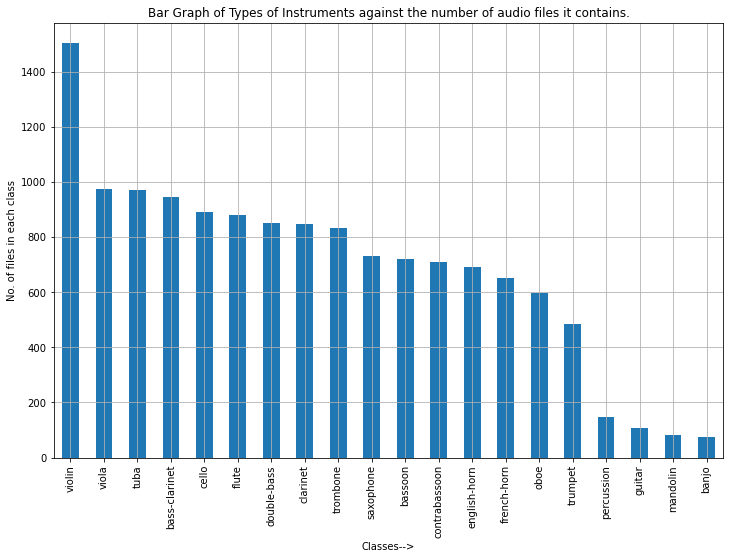

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12,8))

ds_classes.value_counts().plot(kind='bar')
plt.grid(True)
plt.xlabel('Classes-->')
plt.ylabel('No. of files in each class')
plt.title('Bar Graph of Types of Instruments against the number of audio files it contains.')

### Plotting Histogram of duration of Audio Files

#### Finding the maximum duration and minimum duration of mp3 files

In [7]:
#maximum duration
print(max(durations))
#minimum duration
print(min(durations))

77.60979591836735
0.0783673469387755


Text(0.5, 1.0, 'Histogram of duration of audio files')

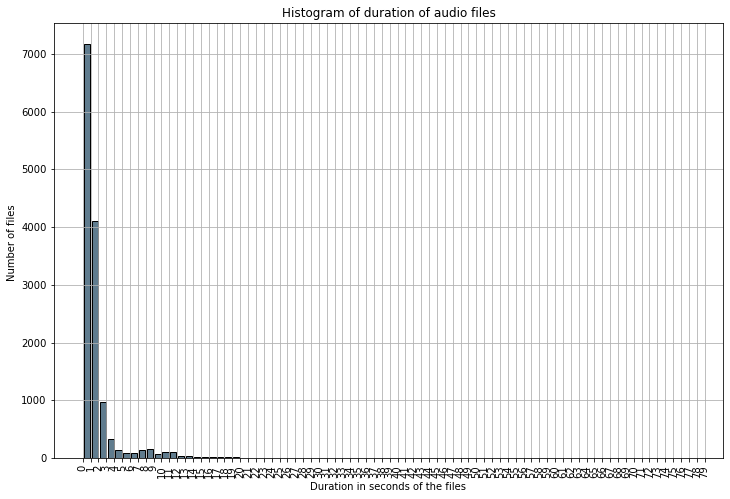

In [9]:
#Importing necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


# Plotting histogram of duration of audio files

ds_duration = pd.Series(durations)   #converting list of durations into a panda series
w = 1
n = math.ceil((ds_duration.max() - ds_duration.min())/w)      #Here we have taken bins which is equal to the difference of                                                          themax duration of
plt.figure(figsize=(12,8))                                    # the maximum duration of an audio files and the minimum duration   
ds_duration.hist(grid=True, bins=n, rwidth=0.8,               #of an audio file
                   color='#607c8e', histtype='bar', ec='black')      #plotting histogram
plt.xticks(np.arange(0,80,1), rotation=90);
plt.xlabel('Duration in seconds of the files')
plt.ylabel('Number of files ')
plt.title('Histogram of duration of audio files')




#### Since most of the durations are lower than 22 seconds, so we are zooming in and plotting just the bins until 20 seconds 

Text(0.5, 1.0, 'Histogram of duration of audio files with duration less than 22seconds')

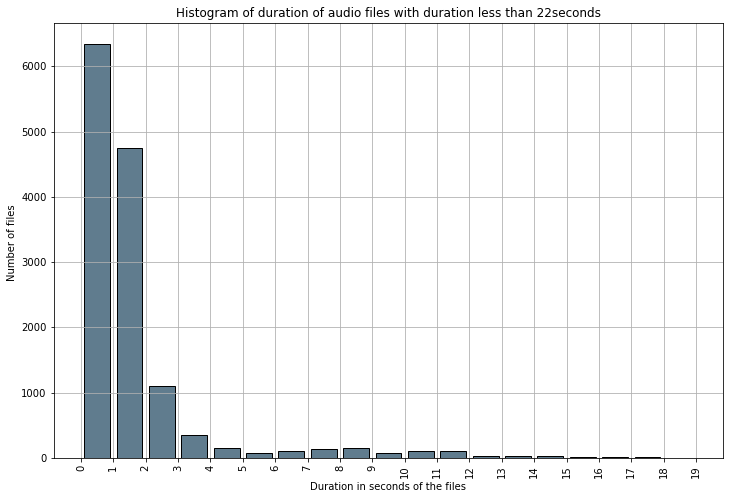

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

#converting the duration into panda series and then plotting the histogram for just 20bins
ds_duration = pd.Series(durations)
w = 1
n = math.ceil((ds_duration.max() - ds_duration.min())/w) 
plt.figure(figsize=(12,8))
ds_duration.hist(grid=True, bins=np.arange(0,20,1), rwidth=0.8,
                   color='#607c8e', histtype='bar', ec='black')        # Here we are taking only 20 bins to get a better look
plt.xticks(np.arange(0,20,1), rotation=90);
plt.xlabel('Duration in seconds of the files')
plt.ylabel('Number of files ')
plt.title('Histogram of duration of audio files with duration less than 22seconds')